#<font color='#301210[link text](https://)'> Data Mining 1 Final Group Project - Group 43

Francisco Mattioli - 20231437

Samuel Maciel - 20230283

Tomás Gameiro - r20201542

# 1 - IMPORTING DATA

## 1.1 - Import Libraries

In [4]:
# Importing python packages
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from math import ceil

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

from collections import Counter
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, estimate_bandwidth



from sklearn.base import clone
from sklearn.metrics import pairwise_distances

from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz


sns.set()

## 1.2 - Import Dataset

In [5]:
# Allow Colab to see Google Drive files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
## Load excel file into a dataframe
## SAMUEL
data_path = "/content/drive/MyDrive/DM1_PROJECT/WONDWINE.xlsx"
## TOMAS
#data_path = "/content/drive/MyDrive/Colab Data/DM1_2324_WonderfulWinesWorld.xlsx"
#sheet_name = "www_customer_table"

df = pd.read_excel(data_path)

In [7]:
## Copy the original dataset (so that we can make changes and the original remains intact)
df_original = df.copy()

## 1.3 - Analyze the Dataset

In [8]:
## Retrieve the dimensions (number of rows and columns) of the DataFrame 'df'
df.shape

(10000, 21)

In [9]:
## Display the data type of each variable in the DataFrame 'df'
df.dtypes

Custid         int64
Dayswus        int64
Age            int64
Educ           int64
Income         int64
Kidhome        int64
Teenhome       int64
Freq           int64
Recency        int64
Monetary       int64
LTV            int64
Perdeal        int64
Dryred         int64
Sweetred       int64
Drywh          int64
Sweetwh        int64
Dessert        int64
Exotic         int64
WebPurchase    int64
WebVisit       int64
Access         int64
dtype: object

In [10]:
## # Display the first 10 rows of the dataset stored in the DataFrame 'df'
df.head(10)

,Custid,Dayswus,Age,Educ,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Access
0,1001,789,68,16,90782,0,0,29,66,1402,...,3,37,5,44,10,3,2,19,4,1
1,1002,623,78,20,113023,0,0,31,6,1537,...,1,55,1,38,4,2,2,9,1,0
2,1003,583,24,18,28344,1,0,4,69,44,...,66,32,19,24,1,24,63,59,7,1
3,1004,893,59,19,93571,0,1,21,10,888,...,12,60,10,19,6,5,15,35,5,0
4,1005,1062,59,18,91852,0,1,25,26,1138,...,5,59,5,28,4,4,19,34,6,0
5,1006,792,32,20,22386,1,1,5,65,56,...,96,47,2,48,2,1,29,67,9,1
6,1007,1120,45,17,69485,1,1,11,73,345,...,61,71,7,13,1,8,3,46,7,0
7,1008,658,54,18,68602,0,1,2,44,41,...,15,84,1,12,2,0,3,37,3,0
8,1009,792,74,18,109499,0,0,29,75,1401,...,3,38,9,35,9,9,9,17,1,1
9,1010,1109,20,14,23846,1,0,1,153,19,...,55,18,55,17,10,1,6,39,7,0


In [11]:
## Generate a summary of the statistical characteristics of the dataset in DataFrame 'df'
df.describe()

,Custid,Dayswus,Age,Educ,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Access
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6000.50000,898.102000,47.927300,16.739100,69904.358000,0.418800,0.469800,14.628100,62.406800,622.555200,...,32.397200,50.382700,7.054500,28.521300,7.069800,6.947400,16.546600,42.376200,5.216600,0.246000
std,2886.89568,202.492789,17.302721,1.876375,27612.233311,0.493387,0.499112,11.969073,69.874255,647.135323,...,27.897094,23.453815,7.866544,12.583957,8.015083,7.879546,17.247672,18.522062,2.330457,0.539178
min,1001.00000,550.000000,18.000000,12.000000,10000.000000,0.000000,0.000000,1.000000,0.000000,6.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,3500.75000,723.750000,33.000000,15.000000,47642.000000,0.000000,0.000000,4.000000,26.000000,63.000000,...,6.000000,32.000000,2.000000,19.000000,2.000000,2.000000,4.000000,28.000000,3.000000,0.000000
50%,6000.50000,894.000000,48.000000,17.000000,70012.000000,0.000000,0.000000,12.000000,52.000000,383.000000,...,25.000000,51.000000,4.000000,28.000000,4.000000,4.000000,10.000000,45.000000,6.000000,0.000000
75%,8500.25000,1074.000000,63.000000,18.000000,92147.000000,1.000000,1.000000,24.000000,78.250000,1077.000000,...,56.000000,69.000000,10.000000,37.000000,10.000000,9.000000,23.000000,57.000000,7.000000,0.000000
max,11000.00000,1250.000000,78.000000,20.000000,140628.000000,1.000000,1.000000,56.000000,549.000000,3052.000000,...,97.000000,99.000000,75.000000,74.000000,62.000000,77.000000,96.000000,88.000000,10.000000,3.000000


# 2 - DATA PREPARATION

## 2.1 - Copy the Original Dataset

In [12]:
## Create a copy of the original DataFrame 'df' to safeguard the original data
df_prep = df.copy()

## 2.2 - Replace Index Column

In [13]:
## Replace the index of the dataset with the 'Custid' column, setting it as the new index
df_prep.set_index('Custid', inplace = True)
df_prep.head(10)

,Dayswus,Age,Educ,Income,Kidhome,Teenhome,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Access
Custid,,,,,,,,,,,,,,,,,,,,
1001,789,68,16,90782,0,0,29,66,1402,699,3,37,5,44,10,3,2,19,4,1
1002,623,78,20,113023,0,0,31,6,1537,565,1,55,1,38,4,2,2,9,1,0
1003,583,24,18,28344,1,0,4,69,44,-3,66,32,19,24,1,24,63,59,7,1
1004,893,59,19,93571,0,1,21,10,888,207,12,60,10,19,6,5,15,35,5,0
1005,1062,59,18,91852,0,1,25,26,1138,355,5,59,5,28,4,4,19,34,6,0
1006,792,32,20,22386,1,1,5,65,56,-18,96,47,2,48,2,1,29,67,9,1
1007,1120,45,17,69485,1,1,11,73,345,-45,61,71,7,13,1,8,3,46,7,0
1008,658,54,18,68602,0,1,2,44,41,9,15,84,1,12,2,0,3,37,3,0
1009,792,74,18,109499,0,0,29,75,1401,613,3,38,9,35,9,9,9,17,1,1


## 2.3 - Change Variables Data Type

In [14]:
## Convert 'Kidhome' and 'Teenhome' variables to boolean as they represent binary values
df_prep['Kidhome'] = df_prep['Kidhome'].astype(bool)
df_prep['Teenhome'] = df_prep['Teenhome'].astype(bool)

In [15]:
## Display the first 10 rows of the DataFrame 'df_prep' after converting 'Kidhome' and 'Teenhome' variables to boolean
df_prep.head(10)

,Dayswus,Age,Educ,Income,Kidhome,Teenhome,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Access
Custid,,,,,,,,,,,,,,,,,,,,
1001,789,68,16,90782,False,False,29,66,1402,699,3,37,5,44,10,3,2,19,4,1
1002,623,78,20,113023,False,False,31,6,1537,565,1,55,1,38,4,2,2,9,1,0
1003,583,24,18,28344,True,False,4,69,44,-3,66,32,19,24,1,24,63,59,7,1
1004,893,59,19,93571,False,True,21,10,888,207,12,60,10,19,6,5,15,35,5,0
1005,1062,59,18,91852,False,True,25,26,1138,355,5,59,5,28,4,4,19,34,6,0
1006,792,32,20,22386,True,True,5,65,56,-18,96,47,2,48,2,1,29,67,9,1
1007,1120,45,17,69485,True,True,11,73,345,-45,61,71,7,13,1,8,3,46,7,0
1008,658,54,18,68602,False,True,2,44,41,9,15,84,1,12,2,0,3,37,3,0
1009,792,74,18,109499,False,False,29,75,1401,613,3,38,9,35,9,9,9,17,1,1


## 2.4 - Duplicate Values

In [16]:
## Count the number of duplicate rows in the DataFrame 'df_prep'
df_prep.duplicated().sum()

0

## 2.5 - Missing Values

In [17]:
## Count the number of missing values in each column of the DataFrame 'df_prep'
df_prep.isna().sum()

Dayswus        0
Age            0
Educ           0
Income         0
Kidhome        0
Teenhome       0
Freq           0
Recency        0
Monetary       0
LTV            0
Perdeal        0
Dryred         0
Sweetred       0
Drywh          0
Sweetwh        0
Dessert        0
Exotic         0
WebPurchase    0
WebVisit       0
Access         0
dtype: int64

## 2.6 - Metric and Non-Metric Features

In [18]:
## Define metric variables representing quantitative features
metric_variables = ['Dayswus', 'Age', 'Educ', 'Income', 'Freq', 'Recency',
    'Monetary', 'LTV', 'Perdeal', 'Dryred', 'Sweetred', 'Drywh',
    'Sweetwh', 'Dessert', 'Exotic', 'WebPurchase', 'WebVisit', 'Access']

# Define non-metric variables representing categorical or binary features
non_metric_variables = ['Teenhome', 'Kidhome']

## 2.7 - Outliers

**OBJECTIVE:** The objective of this section is to conduct an analysis of various variables to identify potential outliers within the dataset.

**METHODOLOGY:** To accomplish this analysis, we employed a two-step approach. Initially, we performed a preliminary visual assessment utilizing boxplots and histograms. Subsequently, we conducted statistical computations involving skewness and kurtosis. For determining potential outliers, we established a guideline considering skewness values greater than the absolute value of 1 and kurtosis values greater than the absolute value of 3.

**TREATMENT APPROACH:** In confirming the existence of outliers and deciding on appropriate measures, we utilized both the interquartile range method and a manual filtering method to examine and address the outliers within the data.

### 2.7.1 - Days With Us

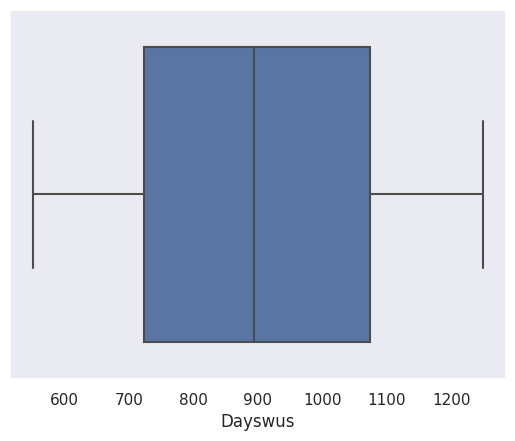

In [19]:
## Display a boxplot for the column 'Dayswus' to visualize its distribution
sns.boxplot(x=df_prep['Dayswus'])
plt.grid(False)
plt.show()

<Axes: >

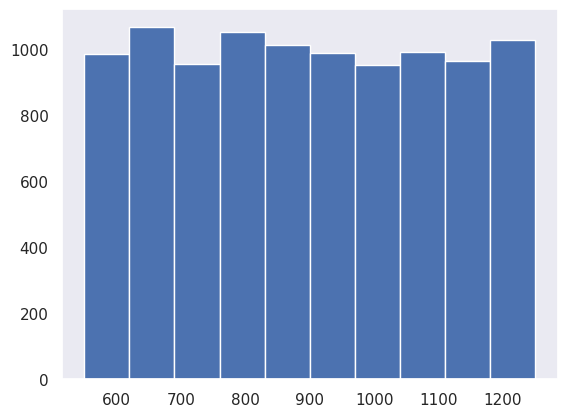

In [20]:
## Display a histogram for the column 'Dayswus' to visualize its distribution
df_prep['Dayswus'].hist(grid=False)

In [21]:
## Calculate the skewness of the 'Dayswus' column
skewness = df_prep['Dayswus'].skew()
print(skewness)

## Interpretation of skewness values:
## Skewness = 0: Perfectly symmetrical distribution
## Skewness > 0: Asymmetrical distribution extending towards positive values
## Skewness < 0: Asymmetrical distribution extending towards negative values

0.02359399205663874


In [22]:
## Calculate the kurtosis of the 'Dayswus' column
kurtosis = df_prep['Dayswus'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values:
## High Kurtosis: Indicates a distribution with more potential outliers or heavier tails.
## Low Kurtosis: Indicates a distribution with fewer potential outliers or lighter tails.

-1.2008574215131802



**CONCLUSION**: By analyzing all the methods, we can conclude that the variable "Dayswus" does not have outliers.

### 2.7.2 - Age

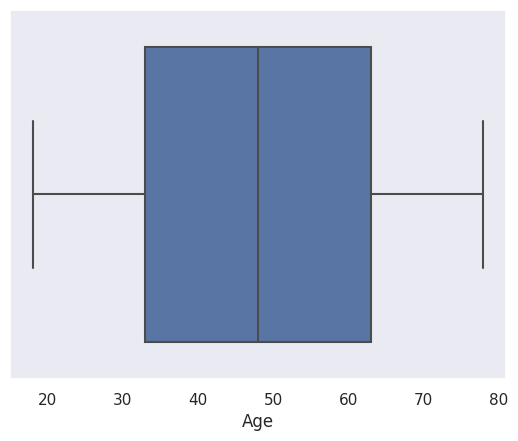

In [23]:
## Display a boxplot for the column 'Age' to visualize its distribution
sns.boxplot(x=df_prep['Age'])
plt.grid(False)
plt.show()

<Axes: >

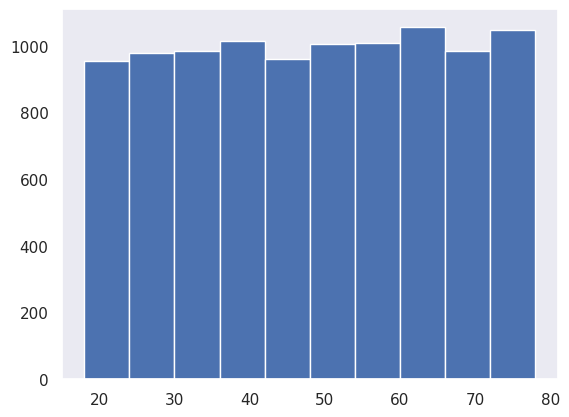

In [24]:
## Display a histogram for the column 'Age' to visualize its distribution
df_prep['Age'].hist(grid=False)

In [25]:
## Calculate the skewness of the 'Age' column
skewness = df_prep['Age'].skew()
print(skewness)

## Interpretation of skewness values:
## Skewness = 0: Represents a perfectly symmetrical distribution
## Skewness > 0: Indicates an asymmetrical distribution extending towards positive values
## Skewness < 0: Indicates an asymmetrical distribution extending towards negative values

-0.01035582860205825


In [26]:
## Calculate the kurtosis of the 'Age' column
kurtosis = df_prep['Age'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values:
## High Kurtosis: Suggests a distribution with more potential outliers or heavier tails.
## Low Kurtosis: Suggests a distribution with fewer potential outliers or lighter tails.

-1.1971005095883223


**CONCLUSION**: By analyzing all the methods, we can conclude that the variable "Age" does not have outliers.

### 2.7.3 - Education

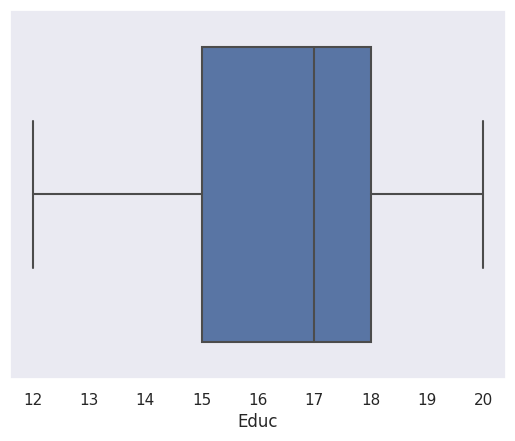

In [27]:
## Display a boxplot for the column 'Educ' to visualize its distribution
sns.boxplot(x=df_prep['Educ'])
plt.grid(False)
plt.show()

<Axes: >

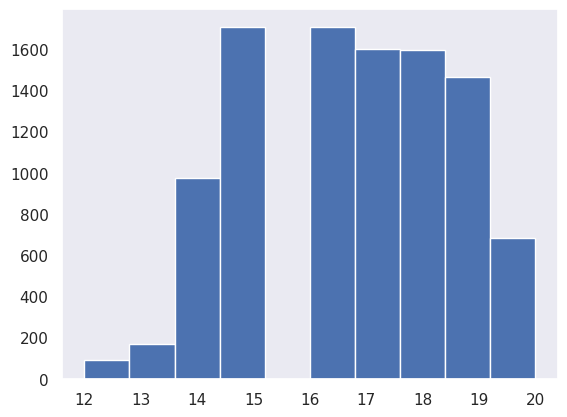

In [28]:
## Display a histogram for the column 'Educ' to visualize its distribution
df_prep['Educ'].hist(grid=False)

In [29]:
## Calculate the skewness of the 'Educ' column
skewness = df_prep['Educ'].skew()
print(skewness)

## Interpretation of skewness values:
## Skewness = 0: Represents a perfectly symmetrical distribution
## Skewness > 0: Indicates an asymmetrical distribution extending towards positive values
## Skewness < 0: Indicates an asymmetrical distribution extending towards negative values

-0.06575980945271234


In [30]:
## Calculate the kurtosis of the 'Educ' column
kurtosis = df_prep['Educ'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values:
## High Kurtosis: Suggests a distribution with more potential outliers or heavier tails.
## Low Kurtosis: Suggests a distribution with fewer potential outliers or lighter tails.

-0.8288230134581549


**CONCLUSION**: By analyzing all the methods, we can conclude that the variable "Educ" does not have outliers.

### 2.7.4 - Income

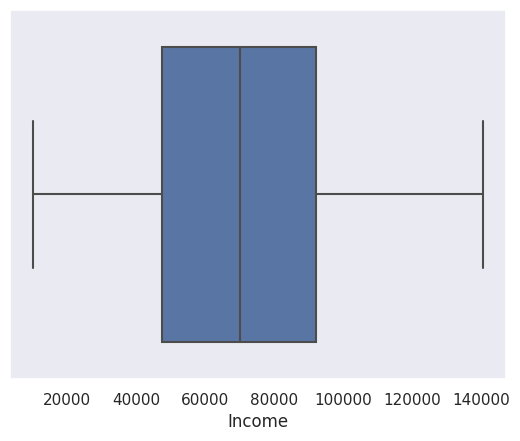

In [31]:
## Display a boxplot for the column 'Income' to visualize its distribution
sns.boxplot(x=df_prep['Income'])
plt.grid(False)
plt.show()

<Axes: >

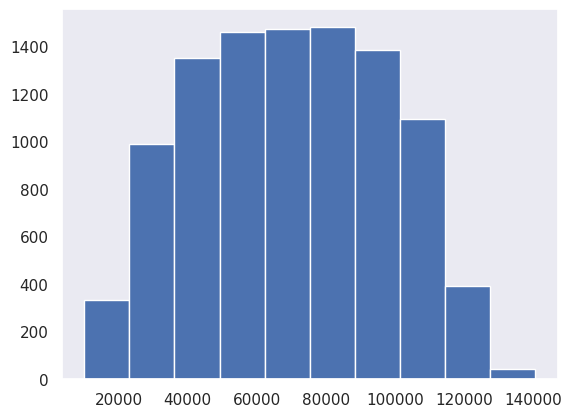

In [32]:
## Display a histogram for the column 'Income’ to visualize its distribution
df_prep['Income'].hist(grid=False)

In [33]:
## Calculate the skewness of the 'Income' column
skewness = df_prep['Income'].skew()
print(skewness)

## Interpretation of skewness values for 'Income':
## Skewness = 0: Indicates a perfectly symmetrical distribution
## Skewness > 0: Suggests an asymmetrical distribution extending towards positive values
## Skewness < 0: Suggests an asymmetrical distribution extending towards negative values

0.005863067473719987


In [34]:
## Calculate the kurtosis of the 'Income' column
kurtosis = df_prep['Income'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values for 'Income':
## High Kurtosis: Suggests a distribution with more potential outliers or heavier tails.
## Low Kurtosis: Suggests a distribution with fewer potential outliers or lighter tails.

-0.9248106897176664


**CONCLUSION**: By analyzing all the methods, we can conclude that the variable "Income" does not have outliers.

### 2.7.5 - Kids at Home

In the case of non-metric variables like 'Kidhome', analyzing outliers through techniques such as boxplots, histograms, skewness, and kurtosis might not be meaningful. Instead, our approach was to exclusively examine the variable's distribution using a bar chart visualization and the 'value_counts()' expression. This method provides an understanding of the frequency of each unique value present within the 'Kidhome' variable. By utilizing a bar chart and 'value_counts()', we gained insight into the exact count of occurrences for different categorical values in the 'Kidhome' column.

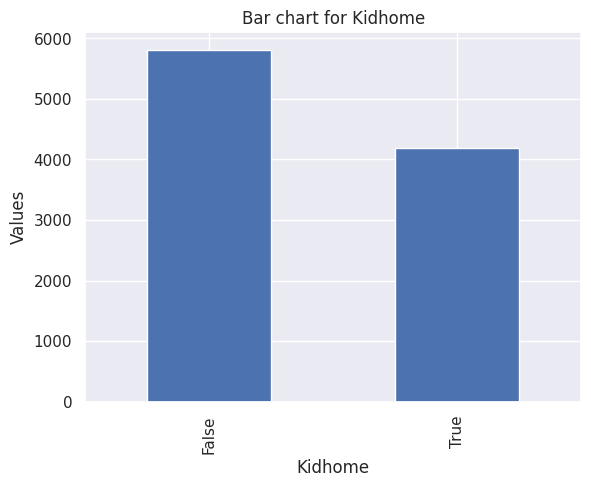

In [35]:
## Visualizing the distribution of 'Kidhome' using a bar plot
df_prep['Kidhome'].value_counts().plot(kind='bar')

## Adding title and labels to the axes
plt.title('Bar chart for Kidhome')
plt.xlabel('Kidhome')
plt.ylabel('Values')

## Displaying the plot
plt.show()

In [36]:
## Counting the occurrences of 'True' and 'False' labels in the 'Kidhome' column
df_prep['Kidhome'].value_counts()

False    5812
True     4188
Name: Kidhome, dtype: int64

### 2.7.6 - Teens at Home

For non-metric variables like 'Kidhome', conventional outlier analysis methods such as boxplots, histograms, skewness, and kurtosis are inappropriate. Instead, we focused on examining the variable's distribution solely using a bar chart visualization and the 'value_counts()' expression. This approach offers a clear understanding of the frequency count for each unique value present within the 'Kidhome' variable, providing an overview of the dataset's categorical distribution.

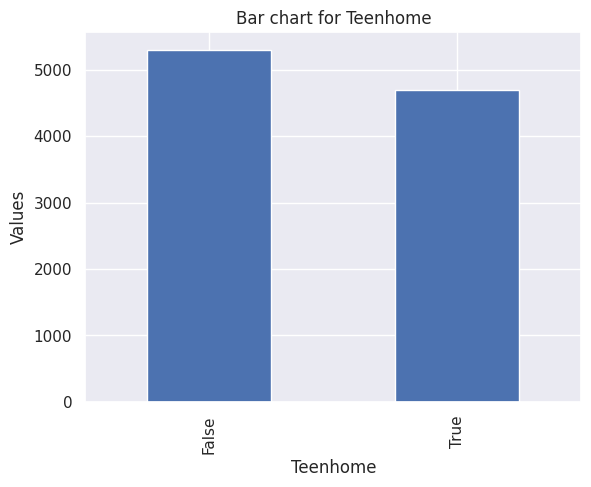

In [37]:
## Creating a bar plot to visualize the distribution of 'Teenhome'
df_prep['Teenhome'].value_counts().plot(kind='bar')

## Adding title and labels to the axes
plt.title('Bar chart for Teenhome')
plt.xlabel('Teenhome')
plt.ylabel('Values')

## Displaying the plot
plt.show()

In [38]:
## Counting the occurrences of 'True' and 'False' labels in the 'Teenhome' column
df_prep['Teenhome'].value_counts()

False    5302
True     4698
Name: Teenhome, dtype: int64

### 2.7.7 - Frequency

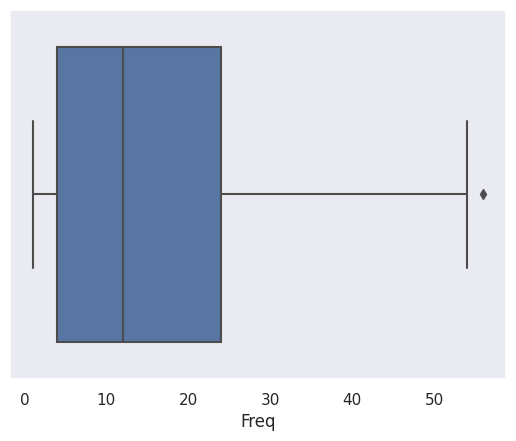

In [39]:
## Display a boxplot for the column 'Freq' to visualize its distribution
sns.boxplot(x=df_prep['Freq'])
plt.grid(False)
plt.show()

<Axes: >

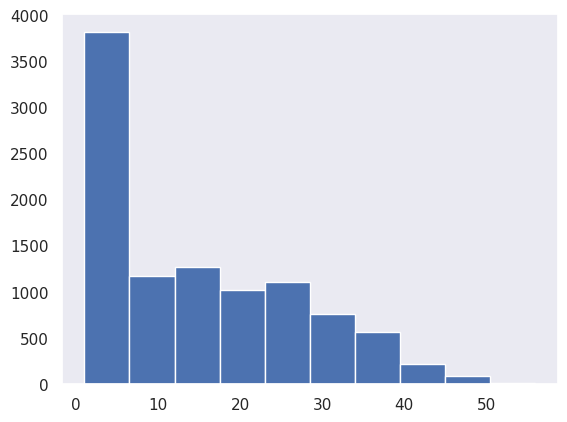

In [40]:
## Display a histogram for the column 'Freq' to visualize its distribution
df_prep['Freq'].hist(grid=False)

In [41]:
## Calculate the skewness of the 'Freq' column
skewness = df_prep['Freq'].skew()
print(skewness)

## Interpretation of skewness values for 'Freq':
## Skewness = 0: Represents a perfectly symmetrical distribution
## Skewness > 0: Suggests an asymmetrical distribution extending towards positive values
## Skewness < 0: Suggests an asymmetrical distribution extending towards negative values

0.6951111356385139


In [42]:
## Calculate the kurtosis of the 'Freq' column
kurtosis = df_prep['Freq'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values for 'Freq':
## High Kurtosis: Indicates a distribution with more potential outliers or heavier tails
## Low Kurtosis: Indicates a distribution with fewer potential outliers or lighter tails

-0.5914218934776527


**CONCLUSION**: The boxplot analysis initially indicated potential outliers in the 'Freq' variable. However, subsequent assessments through skewness and kurtosis calculations suggest no evidence of outliers in the 'Freq' distribution. This incongruity between the visual inspection via boxplot and statistical measures emphasizes the necessity for further investigation using alternative outlier detection methods for a comprehensive assessment.


### 2.7.8 - Recency

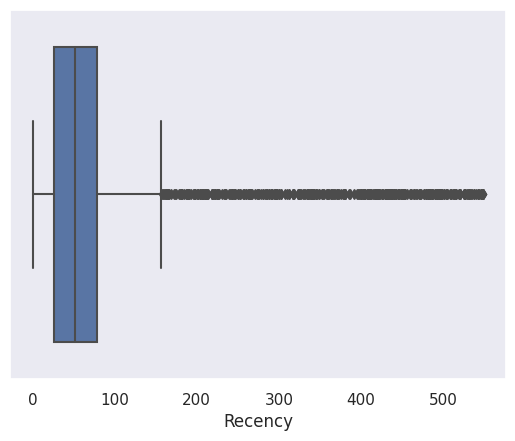

In [43]:
## Displaying a boxplot to visualize the distribution of 'Recency'
sns.boxplot(x=df_prep['Recency'])
plt.grid(False)
plt.show()

<Axes: >

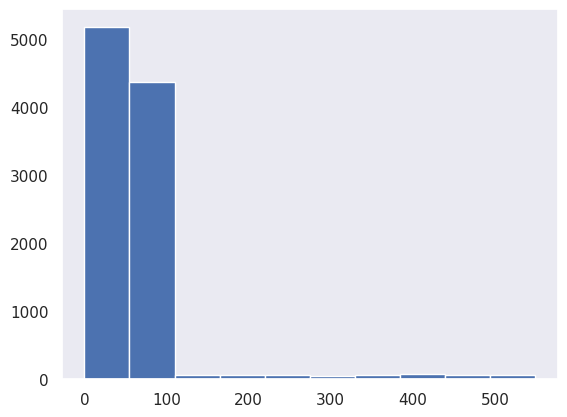

In [44]:
## Displaying a histogram to visualize the distribution of 'Recency'
df_prep['Recency'].hist(grid=False)

In [45]:
## Calculate the skewness of the 'Recency' column
skewness = df_prep['Recency'].skew()
print(skewness)

## Interpretation of skewness values for 'Recency':
## Skewness = 0: Indicates a perfectly symmetrical distribution
## Skewness > 0: Indicates an asymmetrical distribution extending towards positive values
## Skewness < 0: Indicates an asymmetrical distribution extending towards negative values

4.16541734164809


In [46]:
## Calculate the kurtosis of the 'Recency' column
kurtosis = df_prep['Recency'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values for 'Recency':
## High Kurtosis: Indicates a distribution with more potential outliers or heavier tails
## Low Kurtosis: Indicates a distribution with fewer potential outliers or lighter tails

20.95571064033217


**CONCLUSION:** Upon analysis of the visual representations (boxplot and histogram) and statistical calculations, it appears probable that the "Recency" variable might contain outliers. To confirm the presence of outliers, we intend to perform outlier detection methods such as the Interquartile Range (IQR) method or consider a manual approach.

In [47]:
## IQR method for outlier detection in the 'Recency' variable
## Calculating the 1st and 3rd quartiles
Q1 = df_prep['Recency'].quantile(0.25)
Q3 = df_prep['Recency'].quantile(0.75)
IQR = Q3 - Q1

## Establishing the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Counting the number of outlier rows
recency_outliers_count = df_prep[(df_prep['Recency'] < lower_bound) | (df_prep['Recency'] > upper_bound)].shape[0]
recency_outliers_count

385

In [48]:
## Identifying and counting values greater than 100 in the 'Recency' variable
recency_values_greater_100 = df_prep.loc[df_prep['Recency'] > 100]
print(len(recency_values_greater_100))

447


**CONCLUSION:** After confirming outliers using the interquartile range method and manual filtering, we chose not to remove them as they were prevalent and represented more than 3%. Since eliminating these outliers would lead to a significant loss of data, so we retained them for the current analysis.

### 2.7.9 - Monetary

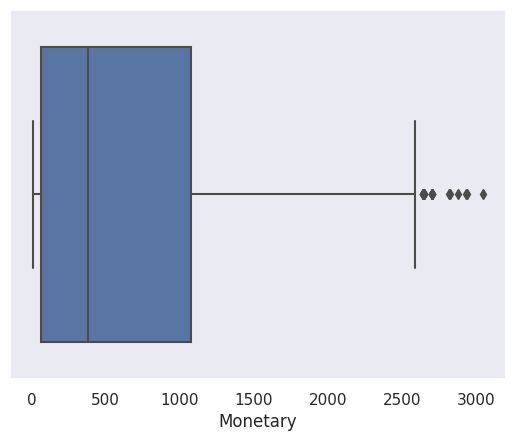

In [49]:
## Displaying a boxplot to visualize the distribution of 'Monetary'
sns.boxplot(x=df_prep['Monetary'])
plt.grid(False)
plt.show()

<Axes: >

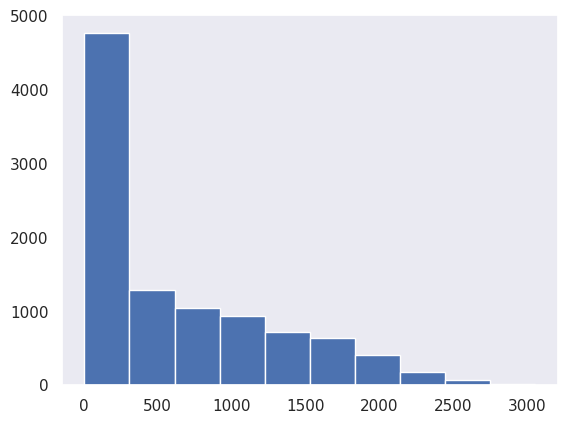

In [50]:
## Displaying a histogram to visualize the distribution of 'Monetary'
df_prep['Monetary'].hist(grid=False)

In [51]:
## Calculating the skewness of the 'Monetary' column
skewness = df_prep['Monetary'].skew()
print(skewness)

## Interpretation of skewness values for 'Monetary':
## Skewness = 0: Indicates a perfectly symmetrical distribution
## Skewness > 0: Indicates an asymmetrical distribution extending towards positive values
## Skewness < 0: Indicates an asymmetrical distribution extending towards negative values

0.9760369264202026


In [52]:
## Calculating the kurtosis of the 'Monetary' column
kurtosis = df_prep['Monetary'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values for 'Monetary':
## High Kurtosis: Indicates a distribution with more potential outliers
## Low Kurtosis: Indicates a distribution with fewer potential outliers

-0.07186597118446603


**Conclusion:** After analyzing 'Monetary' variable for outliers. While the boxplot indicates potential outliers in the 'Monetary' variable, both skewness and kurtosis calculations suggest otherwise. Skewness and kurtosis values fall within ranges indicative of no outliers in 'Monetary'.


### 2.7.10 - LTV (Lifetime Value)

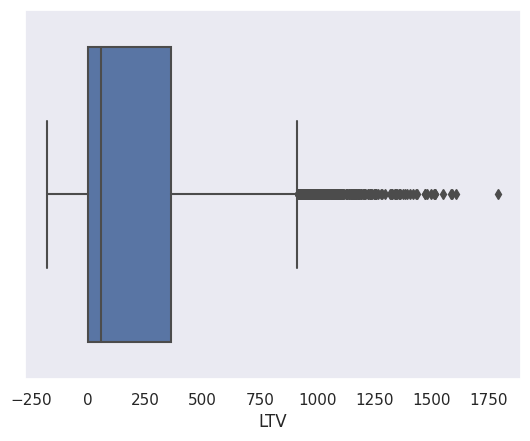

In [53]:
## Displaying a boxplot to visualize the distribution of 'LTV'
sns.boxplot(x=df_prep['LTV'])
plt.grid(False)
plt.show()

<Axes: >

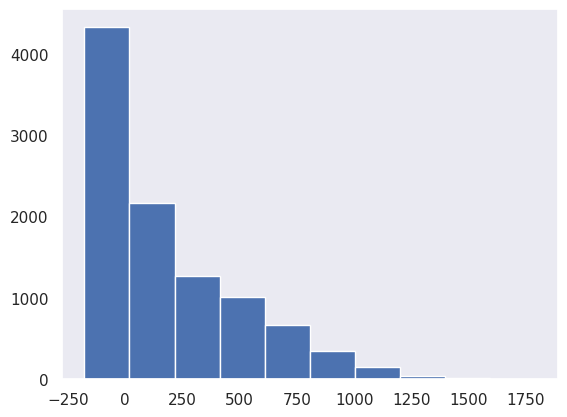

In [54]:
# Displaying a histogram to visualize the distribution of 'LTV'
df_prep['LTV'].hist(grid=False)

In [55]:
# Calculating the skewness of the 'LTV' column
skewness = df_prep['LTV'].skew()
print(skewness)

## Interpretation of skewness values for 'LTV':
## Skewness = 0: Indicates a perfectly symmetrical distribution
## Skewness > 0: Indicates an asymmetrical distribution extending towards positive values
## Skewness < 0: Indicates an asymmetrical distribution extending towards negative values

1.4467410994533887


In [56]:
## Calculating the kurtosis of the 'LTV' column
kurtosis = df_prep['LTV'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values for 'LTV':
## High Kurtosis: Indicates a distribution with more potential outliers
## Low Kurtosis: Indicates a distribution with fewer potential outliers

1.5404613230451694


**CONCLUSION**: Based on the analysis of graphs and statistical calculations, it appears that the "LTV" variable potentially contains outliers. To verify and identify these outliers, further methods such as using the Interquartile Range (IQR) or employing manual approaches will be employed.

In [57]:
## IQR method to identify potential outliers in the 'LTV' column
## Define the 1st and 3rd quartiles
Q1 = df_prep['LTV'].quantile(0.25)
Q3 = df_prep['LTV'].quantile(0.75)
IQR = Q3 - Q1

## Define the lower and upper bounds to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Calculate the total number of rows potentially affected by outliers
LTV_outliers_count = df_prep[(df_prep['LTV'] < lower_bound) | (df_prep['LTV'] > upper_bound)].shape[0]
LTV_outliers_count

322

In [58]:
## Analyzing values greater than 900 in the 'LTV' column to identify potential outliers
## By analyzing the boxplot, it is evident that most outliers are greater than 900
## Let's determine the total count of values exceeding 900
LTV_values_greater_900 = df_prep.loc[df_prep['LTV'] > 900]
print(len(LTV_values_greater_900))

341


**CONCLUSION:** After confirming outliers using the interquartile range method and manual filtering, we chose not to remove them as they were prevalent and represented more than 3%. Since eliminating these outliers would lead to a significant loss of data, so we retained them for the current analysis.

### 2.7.11 - Perdeal

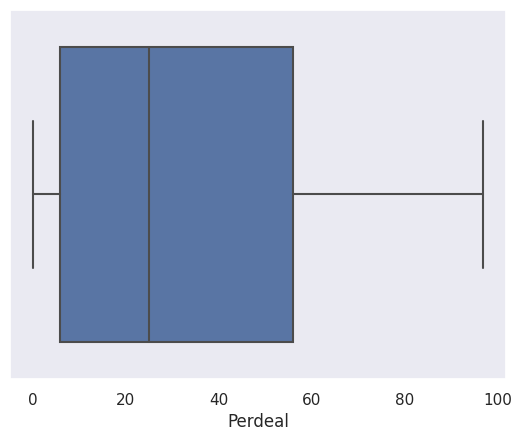

In [59]:
## Displaying a boxplot to visualize the distribution of 'Perdeal'
sns.boxplot(x=df_prep['Perdeal'])
plt.grid(False)
plt.show()

<Axes: >

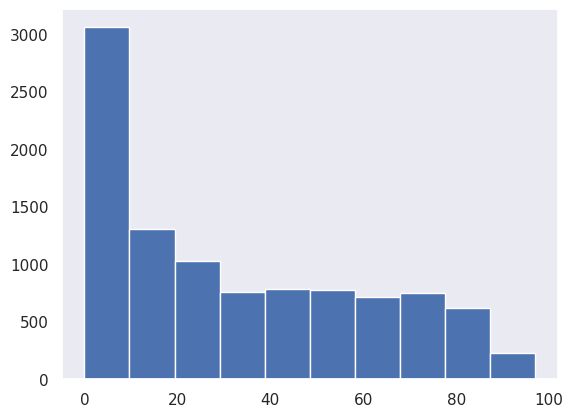

In [60]:
## Displaying a histogram to visualize the distribution of 'Perdeal'
df_prep['Perdeal'].hist(grid=False)

In [61]:
## Calculate the skewness of the 'Perdeal' column
skewness = df_prep['Perdeal'].skew()
print(skewness)

## Interpretation of skewness values for 'Recency':
## Skewness = 0: Indicates a perfectly symmetrical distribution
## Skewness > 0: Indicates an asymmetrical distribution extending towards positive values
## Skewness < 0: Indicates an asymmetrical distribution extending towards negative values

0.5192271815551865


In [62]:
## Calculate the kurtosis of the 'Perdeal' column
kurtosis = df_prep['Perdeal'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values for 'Perdeal':
## High Kurtosis: Indicates a distribution with more potential outliers or heavier tails
## Low Kurtosis: Indicates a distribution with fewer potential outliers or lighter tails

-1.054211844206383


***CONCLUSION***: By analyzing all the methods, we can conclude that the variable "**Perdeal**" does not have outliers.

### 2.7.12 - Dry Red Wine

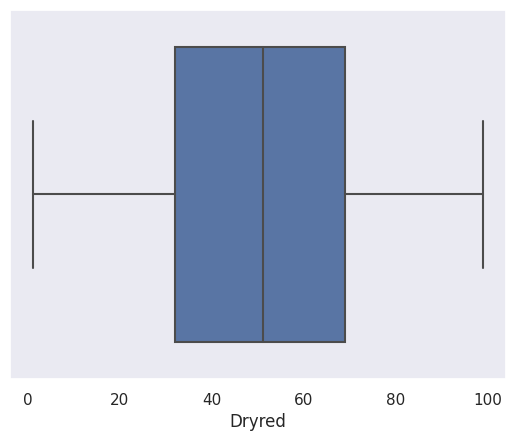

In [63]:
## Displaying a boxplot to visualize the distribution of 'Dryred'
sns.boxplot(x=df_prep['Dryred'])
plt.grid(False)
plt.show()

<Axes: >

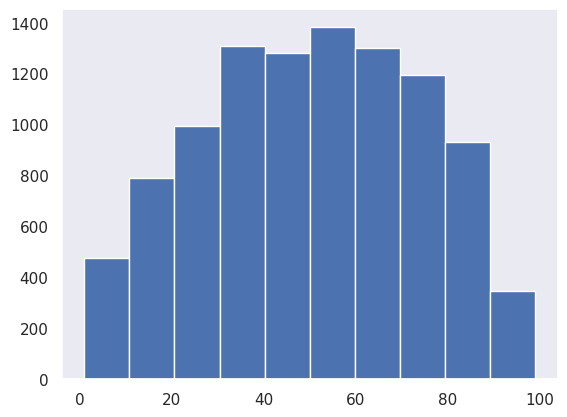

In [64]:
## Displaying a histogram to visualize the distribution of 'Dryred'
df_prep['Dryred'].hist(grid=False)

In [65]:
## Calculate the skewness of the 'Dryred' column
skewness = df_prep['Dryred'].skew()
print(skewness)

## Interpretation of skewness values for 'Dryred':
## Skewness = 0: Indicates a perfectly symmetrical distribution
## Skewness > 0: Indicates an asymmetrical distribution extending towards positive values
## Skewness < 0: Indicates an asymmetrical distribution extending towards negative values

-0.07844525251837986


In [66]:
## Calculate the kurtosis of the 'Dryred' column
kurtosis = df_prep['Dryred'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values for 'Dryred':
## High Kurtosis: Indicates a distribution with more potential outliers or heavier tails
## Low Kurtosis: Indicates a distribution with fewer potential outliers or lighter tails

-0.9263479701492794


***CONCLUSION***: By analyzing all the methods, we can conclude that the variable "**Dryred**" does not have outliers.

### 2.7.13 - Sweet Red Wine

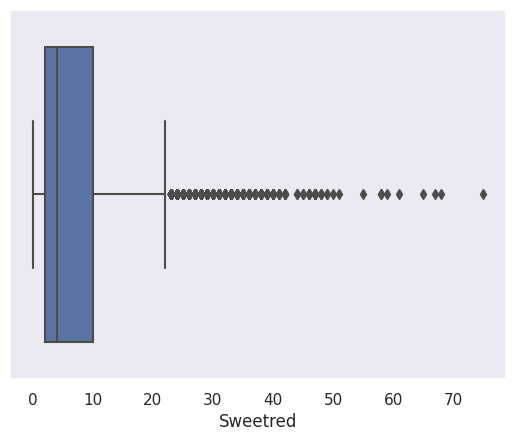

In [67]:
## Displaying a boxplot to visualize the distribution of 'Sweetred'
sns.boxplot(x=df_prep['Sweetred'])
plt.grid(False)
plt.show()

<Axes: >

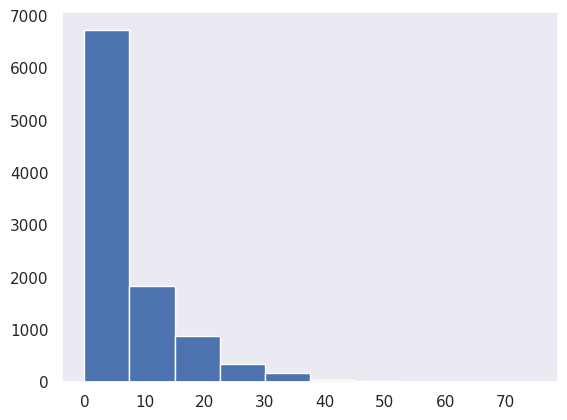

In [68]:
## Displaying a histogram to visualize the distribution of 'Sweetred'
df_prep['Sweetred'].hist(grid=False)

In [69]:
## Calculate the skewness of the 'Sweetred' column
skewness = df_prep['Sweetred'].skew()
print(skewness)

## Interpretation of skewness values for 'Sweetred':
## Skewness = 0: Indicates a perfectly symmetrical distribution
## Skewness > 0: Indicates an asymmetrical distribution extending towards positive values
## Skewness < 0: Indicates an asymmetrical distribution extending towards negative values

2.061278026669286


In [70]:
## Calculate the kurtosis of the 'Sweetred' column
kurtosis = df_prep['Sweetred'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values for 'Sweetred':
## High Kurtosis: Indicates a distribution with more potential outliers or heavier tails
## Low Kurtosis: Indicates a distribution with fewer potential outliers or lighter tails

5.770925709753842


**CONCLUSION:** Upon analysis of the visual representations (boxplot and histogram) and statistical calculations, it appears probable that the "Sweetred" variable might contain outliers. To confirm the presence of outliers, we intend to perform outlier detection methods such as the Interquartile Range (IQR) method or consider a manual approach.

In [71]:
## IQR method for identifying potential outliers in the variable "Sweetred"
## Define the 1st and 3rd quartiles
Q1 = df_prep['Sweetred'].quantile(0.25)
Q3 = df_prep['Sweetred'].quantile(0.75)
IQR = Q3 - Q1

## Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Calculate the total number of rows potentially affected by outliers
Sweetred_outliers_count = df_prep[(df_prep['Sweetred'] < lower_bound) | (df_prep['Sweetred'] > upper_bound)].shape[0]
Sweetred_outliers_count

565

In [72]:
## After analyzing the boxplot, it's evident that a majority of outliers are above the value of 22
## We'll calculate the total count of values exceeding 22 to further investigate
Sweetred_values_greater_22 = df_prep.loc[df_prep['Sweetred'] > 22]
print(len(Sweetred_values_greater_22))

565


**CONCLUSION:** After confirming outliers using the interquartile range method and manual filtering, we chose not to remove them as they were prevalent and represented more than 3%. Since eliminating these outliers would lead to a significant loss of data, so we retained them for the current analysis.

### 2.7.14 - Dry White Wine

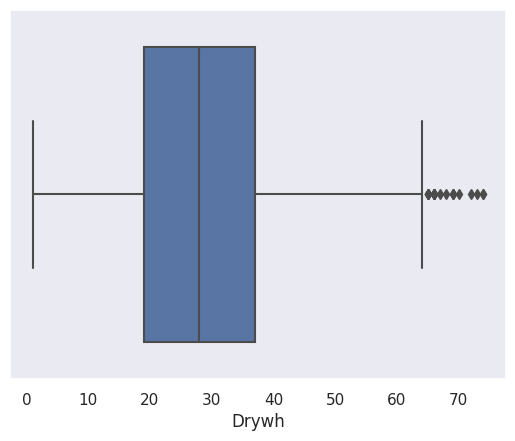

In [73]:
## Displaying a boxplot to visualize the distribution of 'Drywh'
sns.boxplot(x=df_prep['Drywh'])
plt.grid(False)
plt.show()

<Axes: >

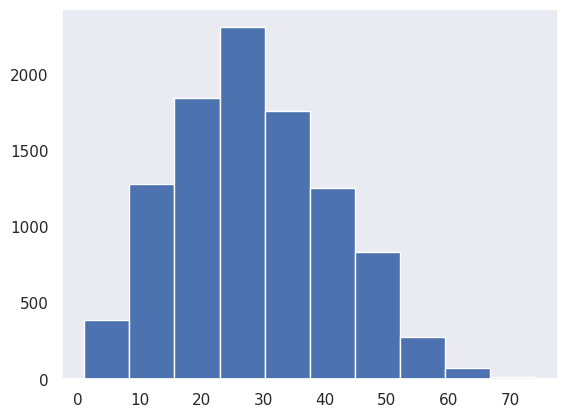

In [74]:
## Displaying a histogram to visualize the distribution of 'Drywh'
df_prep['Drywh'].hist(grid=False)

In [75]:
## Calculate the skewness of the 'Drywh' column
skewness = df_prep['Drywh'].skew()
print(skewness)

## Interpretation of skewness values for 'Drywh':
## Skewness = 0: Indicates a perfectly symmetrical distribution
## Skewness > 0: Indicates an asymmetrical distribution extending towards positive values
## Skewness < 0: Indicates an asymmetrical distribution extending towards negative values

0.320776346737094


In [76]:
## Calculate the kurtosis of the 'Drywh' column
kurtosis = df_prep['Drywh'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values for 'Recency':
## High Kurtosis: Indicates a distribution with more potential outliers or heavier tails
## Low Kurtosis: Indicates a distribution with fewer potential outliers or lighter tails

-0.42687931112437116


***CONCLUSION***: By analyzing all the methods, we can conclude that the variable "**Drywh**" does not have outliers.

### 2.7.15 - Sweet White Wine

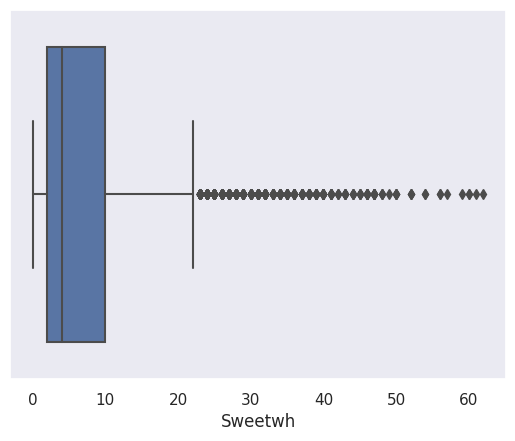

In [77]:
## Displaying a boxplot to visualize the distribution of 'Sweetwh'
sns.boxplot(x=df_prep['Sweetwh'])
plt.grid(False)
plt.show()

<Axes: >

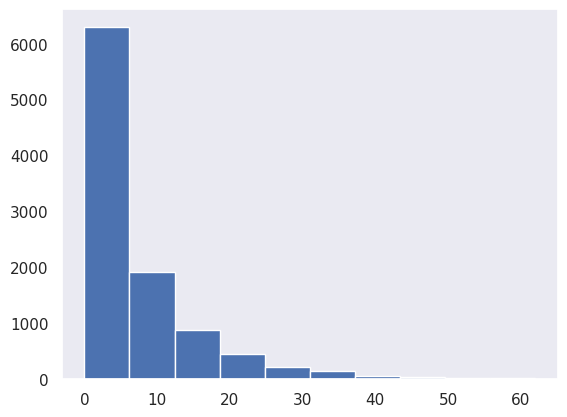

In [78]:
## Displaying a histogram to visualize the distribution of 'Sweetwh'
df_prep['Sweetwh'].hist(grid=False)

In [79]:
## Calculate the skewness of the 'Sweetwh' column
skewness = df_prep['Sweetwh'].skew()
print(skewness)

## Interpretation of skewness values for 'Sweetwh':
## Skewness = 0: Indicates a perfectly symmetrical distribution
## Skewness > 0: Indicates an asymmetrical distribution extending towards positive values
## Skewness < 0: Indicates an asymmetrical distribution extending towards negative values

2.1067787433132525


In [80]:
## Calculate the kurtosis of the 'Sweetwh' column
kurtosis = df_prep['Sweetwh'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values for 'Sweetwh':
## High Kurtosis: Indicates a distribution with more potential outliers or heavier tails
## Low Kurtosis: Indicates a distribution with fewer potential outliers or lighter tails

5.663548862053442


**CONCLUSION:** Upon analysis of the visual representations (boxplot and histogram) and statistical calculations, it appears probable that the "Sweetwh" variable might contain outliers. To confirm the presence of outliers, we intend to perform outlier detection methods such as the Interquartile Range (IQR) method or consider a manual approach.

In [81]:
## IQR for analyzing outliers in the "Sweetwh" variable
## Define the 1st and 3rd quartiles
Q1 = df_prep['Sweetwh'].quantile(0.25)
Q3 = df_prep['Sweetwh'].quantile(0.75)
IQR = Q3 - Q1

## Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Calculate the total number of rows affected
Sweetwh_outliers_count = df_prep[(df_prep['Sweetwh'] < lower_bound) | (df_prep['Sweetwh'] > upper_bound)].shape[0]
Sweetwh_outliers_count

576

In [82]:
## Analyzing outliers in the "Sweetwh" variable
## By observing the boxplot, it appears that most outliers are greater than 22
## Counting the total number of values greater than 22
Sweetwh_values_greater_22 = df_prep.loc[df_prep['Sweetwh'] > 22]
print(len(Sweetwh_values_greater_22))

576


**CONCLUSION:** After confirming outliers using the interquartile range method and manual filtering, we chose not to remove them as they were prevalent and represented more than 3%. Since eliminating these outliers would lead to a significant loss of data, so we retained them for the current analysis.

### 2.7.16 - Dessert Wine

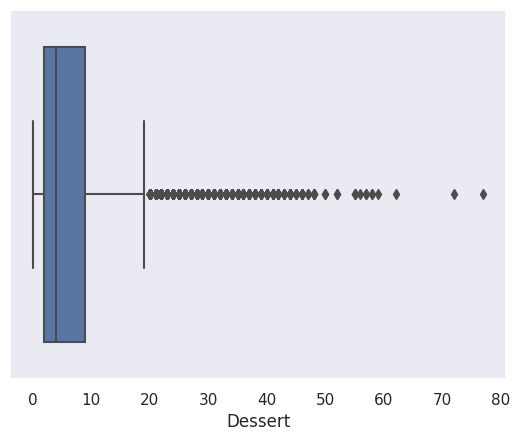

In [83]:
## Displaying a boxplot to visualize the distribution of 'Dessert'
sns.boxplot(x=df_prep['Dessert'])
plt.grid(False)
plt.show()

<Axes: >

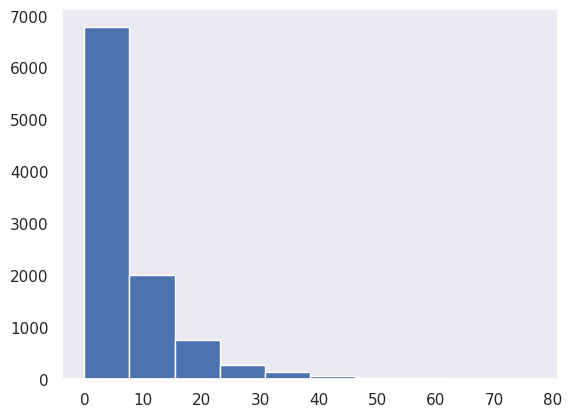

In [84]:
## Displaying a histogram to visualize the distribution of 'Dessert'
df_prep['Dessert'].hist(grid=False)

In [85]:
## Calculate the skewness of the 'Dessert' column
skewness = df_prep['Dessert'].skew()
print(skewness)

## Interpretation of skewness values for 'Dessert':
## Skewness = 0: Indicates a perfectly symmetrical distribution
## Skewness > 0: Indicates an asymmetrical distribution extending towards positive values
## Skewness < 0: Indicates an asymmetrical distribution extending towards negative values

2.2035393720330703


In [86]:
## Calculate the kurtosis of the 'Dessert' column
kurtosis = df_prep['Dessert'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values for 'Dessert':
## High Kurtosis: Indicates a distribution with more potential outliers or heavier tails
## Low Kurtosis: Indicates a distribution with fewer potential outliers or lighter tails

6.669940433120164


**CONCLUSION:** Upon analysis of the visual representations (boxplot and histogram) and statistical calculations, it appears probable that the "Dessert" variable might contain outliers. To confirm the presence of outliers, we intend to perform outlier detection methods such as the Interquartile Range (IQR) method or consider a manual approach.

In [87]:
## IQR method to identify outliers in the "Dessert" variable
## Calculate the 1st (Q1) and 3rd (Q3) quartiles
Q1 = df_prep['Dessert'].quantile(0.25)
Q3 = df_prep['Dessert'].quantile(0.75)
IQR = Q3 - Q1

## Define the lower and upper bounds using the IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Determine the number of rows affected by outliers
Dessert_outliers_count = df_prep[(df_prep['Dessert'] < lower_bound) | (df_prep['Dessert'] > upper_bound)].shape[0]
Dessert_outliers_count

756

In [88]:
## Analyzing outliers in the 'Dessert' variable
## By observing the boxplot, it appears that most outliers are greater than 19
## Counting the total number of values greater than 19
Dessert_values_greater_19 = df_prep.loc[df_prep['Dessert'] > 19]
print(len(Dessert_values_greater_19))

756


**CONCLUSION:** After confirming outliers using the interquartile range method and manual filtering, we chose not to remove them as they were prevalent and represented more than 3%. Since eliminating these outliers would lead to a significant loss of data, so we retained them for the current analysis.

### 2.7.17 - Exotic Wine

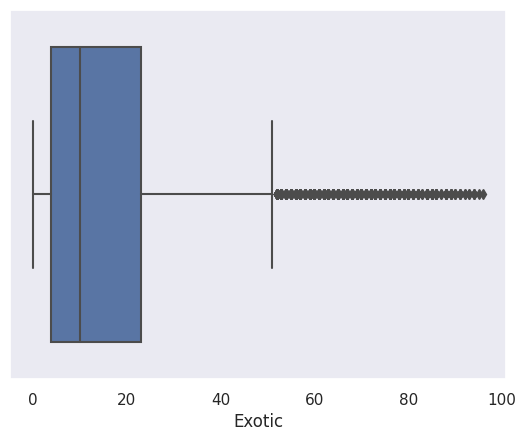

In [89]:
## Displaying a boxplot to visualize the distribution of 'Exotic'
sns.boxplot(x=df_prep['Exotic'])
plt.grid(False)
plt.show()

<Axes: >

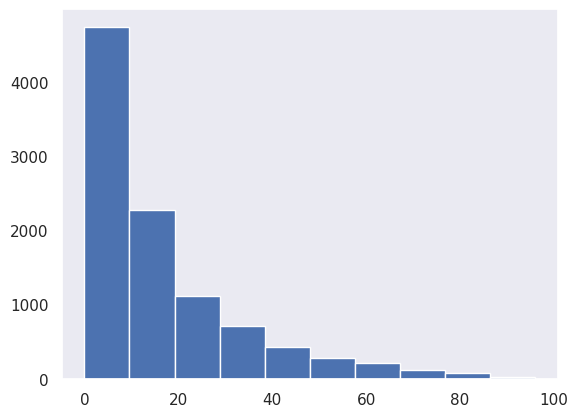

In [90]:
## Displaying a histogram to visualize the distribution of 'Exotic'
df_prep['Exotic'].hist(grid=False)

In [91]:
## Calculate the skewness of the 'Exotic' column
skewness = df_prep['Exotic'].skew()
print(skewness)

## Interpretation of skewness values for 'Exotic':
## Skewness = 0: Indicates a perfectly symmetrical distribution
## Skewness > 0: Indicates an asymmetrical distribution extending towards positive values
## Skewness < 0: Indicates an asymmetrical distribution extending towards negative values

1.713627425984262


In [92]:
## Calculate the kurtosis of the 'Exotic' column
kurtosis = df_prep['Exotic'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values for 'Exotic':
## High Kurtosis: Indicates a distribution with more potential outliers or heavier tails
## Low Kurtosis: Indicates a distribution with fewer potential outliers or lighter tails

2.838065870854709


**CONCLUSION:** Upon analysis of the visual representations (boxplot and histogram) and statistical calculations, it appears probable that the 'Exotic' variable might contain outliers. To confirm the presence of outliers, we intend to perform outlier detection methods such as the Interquartile Range (IQR) method or consider a manual approach.

In [93]:
#3 IQR method for outlier detection in the 'Exotic' variable
## Calculating the 1st and 3rd quartiles
Q1 = df_prep['Exotic'].quantile(0.25)
Q3 = df_prep['Exotic'].quantile(0.75)
IQR = Q3 - Q1

## Establishing the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Counting the number of outlier rows
Exotic_outliers_count = df_prep[(df_prep['Exotic'] < lower_bound) | (df_prep['Exotic'] > upper_bound)].shape[0]
Exotic_outliers_count

590

In [94]:
## Identifying and counting values greater than 52 in the 'Exotic' variable
Exotic_values_greater_52 = df_prep.loc[df_prep['Exotic'] > 52]
print(len(Exotic_values_greater_52))

558


**CONCLUSION:** After confirming outliers using the interquartile range method and manual filtering, we chose not to remove them as they were prevalent and represented more than 3%. Since eliminating these outliers would lead to a significant loss of data, so we retained them for the current analysis.

### 2.7.18 - Web Purchase

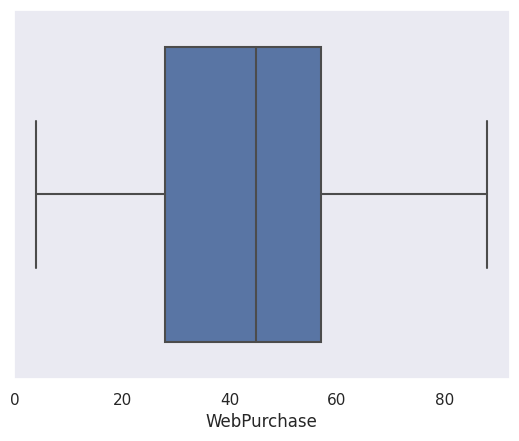

In [95]:
## Displaying a boxplot to visualize the distribution of 'WebPurchase'
sns.boxplot(x=df_prep['WebPurchase'])
plt.grid(False)
plt.show()

<Axes: >

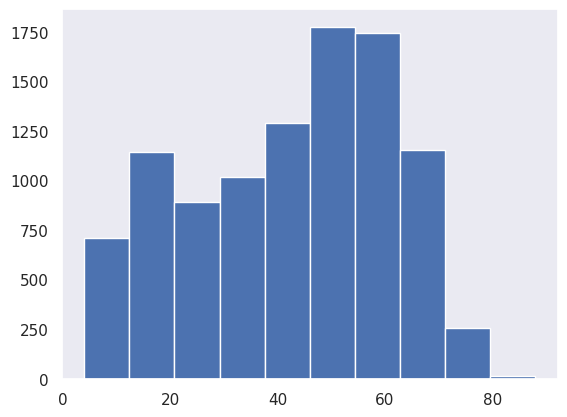

In [96]:
## Displaying a histogram to visualize the distribution of 'WebPurchase'
df_prep['WebPurchase'].hist(grid=False)

In [97]:
## Calculate the skewness of the 'WebPurchase' column
skewness = df_prep['WebPurchase'].skew()
print(skewness)

## Interpretation of skewness values for 'WebPurchase':
## Skewness = 0: Indicates a perfectly symmetrical distribution
## Skewness > 0: Indicates an asymmetrical distribution extending towards positive values
## Skewness < 0: Indicates an asymmetrical distribution extending towards negative values

-0.2635826802093072


In [98]:
## Calculate the kurtosis of the 'WebPurchase' column
kurtosis = df_prep['WebPurchase'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values for 'WebPurchase':
## High Kurtosis: Indicates a distribution with more potential outliers or heavier tails
## Low Kurtosis: Indicates a distribution with fewer potential outliers or lighter tails


-1.0380208588101896


**CONCLUSION**: By analyzing all the methods, we can conclude that the variable "**Perdeal**" does not have outliers.

### 2.7.19 - Web Visit

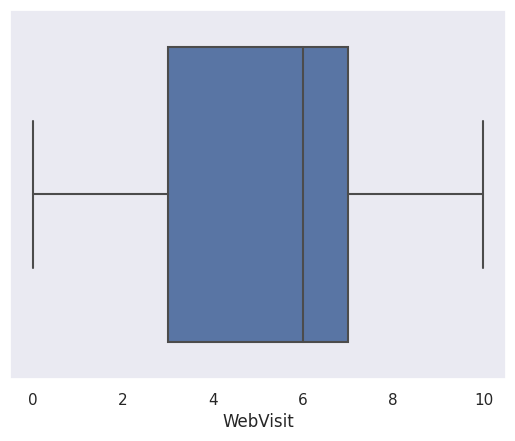

In [99]:
## Displaying a boxplot to visualize the distribution of 'WebVisit'
sns.boxplot(x=df_prep['WebVisit'])
plt.grid(False)
plt.show()

<Axes: >

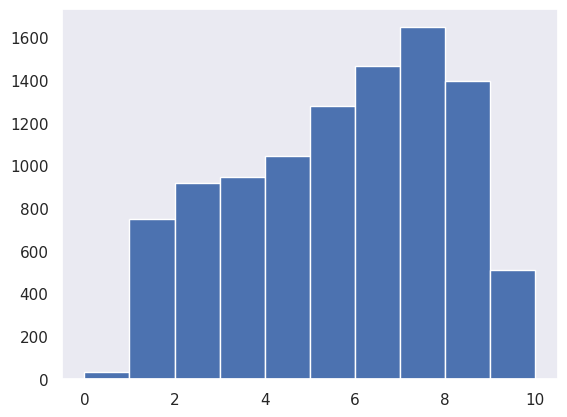

In [100]:
## Displaying a histogram to visualize the distribution of 'WebVisit'
df_prep['WebVisit'].hist(grid=False)

In [101]:
## Calculate the skewness of the 'WebVisit' column
skewness = df_prep['WebVisit'].skew()
print(skewness)

## Interpretation of skewness values for 'WebVisit':
## Skewness = 0: Indicates a perfectly symmetrical distribution
## Skewness > 0: Indicates an asymmetrical distribution extending towards positive values
## Skewness < 0: Indicates an asymmetrical distribution extending towards negative values

-0.27864515835326426


In [102]:
## Calculate the kurtosis of the 'WebVisit' column
kurtosis = df_prep['WebVisit'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values for 'WebVisit':
## High Kurtosis: Indicates a distribution with more potential outliers or heavier tails
## Low Kurtosis: Indicates a distribution with fewer potential outliers or lighter tails

-0.9936679831258877


**CONCLUSION**: By analyzing all the methods, we can conclude that the variable "**Perdeal**" does not have outliers.

### 2.7.20 - Accessories

<Axes: >

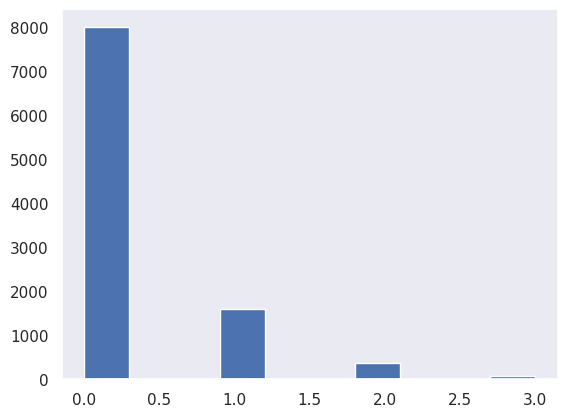

In [103]:
## Displaying a boxplot to visualize the distribution of 'Access'
df_prep['Access'].hist(grid=False)

In [104]:
## Calculate the skewness of the 'Access' column
skewness = df_prep['Access'].skew()
print(skewness)

## Interpretation of skewness values for 'Access':
## Skewness = 0: Indicates a perfectly symmetrical distribution
## Skewness > 0: Indicates an asymmetrical distribution extending towards positive values
## Skewness < 0: Indicates an asymmetrical distribution extending towards negative values

2.338164291800003


In [105]:
## Calculate the kurtosis of the 'Access' column
kurtosis = df_prep['Access'].kurtosis()
print(kurtosis)

## Interpretation of kurtosis values for 'Access':
## High Kurtosis: Indicates a distribution with more potential outliers or heavier tails
## Low Kurtosis: Indicates a distribution with fewer potential outliers or lighter tails

5.499082204565539


**CONCLUSION:** Upon analysis of the visual representations (boxplot and histogram) and statistical calculations, it appears probable that the Access variable might contain outliers. To confirm the presence of outliers, we intend to perform outlier detection methods such as the Interquartile Range (IQR) method or consider a manual approach.


In [106]:
df_prep['Access'].value_counts()

0    8009
1    1579
2     355
3      57
Name: Access, dtype: int64

In [107]:
## Identifying and counting values greater than 2 in the Access variable
Access_values_greater_2 = df_prep.loc[df_prep['Access'] > 2]
print(len(Access_values_greater_2))

57


**CONCLUSION:** After confirming outliers using the interquartile range method and manual filtering, we chose not to remove them since later we dropped this variable, and no longer would affect our data.


## 2.8 - Normalization

In [108]:
## Create a copy of the original dataset to preserve the initial data
df_normalized = df.copy()

In [109]:
## Initialize the StandardScaler to normalize the data for better analysis
scaler = StandardScaler()

In [110]:
## Extract the subset of metric features to prepare them for normalization
df_normalized_metric = df_normalized[metric_variables]

In [111]:
## Apply StandardScaler to standardize the extracted metric features
scaled_features = scaler.fit_transform(df_normalized_metric)

## Update the original dataset with the normalized values for metric variables
## Display or use the df_normalized dataframe with normalized metric variables for further analysis
df_normalized[metric_variables] = scaled_features
df_normalized

,Custid,Dayswus,Age,Educ,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Access
0,1001,-0.538821,1.160147,-0.393917,0.756139,0,0,1.200813,0.051426,1.204514,...,-1.053826,-0.570627,-0.261182,1.230096,0.365604,-0.500993,-0.843437,-1.262136,-0.522070,1.398495
1,1002,-1.358645,1.738120,1.737959,1.561656,0,0,1.367919,-0.807302,1.413136,...,-1.125521,0.196878,-0.769690,0.753274,-0.383022,-0.627910,-0.843437,-1.802060,-1.809436,-0.456273
2,1003,-1.556192,-1.382933,0.672021,-1.505218,1,0,-0.888008,0.094363,-0.894070,...,1.204587,-0.783822,1.518595,-0.359309,-0.757335,2.164268,2.693449,0.897558,0.765296,1.398495
3,1004,-0.025197,0.639972,1.204990,0.857150,0,1,0.532390,-0.750053,0.410205,...,-0.731195,0.410073,0.374453,-0.756660,-0.133480,-0.247159,-0.089675,-0.398259,-0.092948,-0.456273
4,1005,0.809442,0.639972,0.672021,0.794892,0,1,0.866602,-0.521059,0.796542,...,-0.982130,0.367434,-0.261182,-0.041428,-0.383022,-0.374076,0.142252,-0.452251,0.336174,-0.456273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10996,0.340266,-1.151744,0.139052,-0.565443,0,0,0.699496,0.137299,0.600283,...,-0.910434,-0.400070,0.501579,0.594334,-0.757335,0.514345,1.475832,-0.614228,0.336174,-0.456273
9996,10997,-1.289503,1.622525,-0.926887,2.030276,0,1,1.535024,0.180236,1.615577,...,-1.053826,0.452712,-0.642563,-0.279839,-0.258251,-0.120241,-0.901419,0.141665,-0.092948,3.253262
9997,10998,-1.541376,1.217944,1.204990,1.076520,0,0,1.284366,0.509415,1.308053,...,-1.089673,-0.186874,-0.896817,0.038042,0.490375,0.895096,-0.727474,-1.316129,-0.951192,-0.456273
9998,10999,-1.482112,0.986755,-1.459856,1.489039,1,0,1.117260,-0.835926,1.124156,...,-1.017978,-0.101596,1.137214,-0.120898,0.116062,-0.754827,-0.495547,-0.344266,-0.522070,-0.456273


In [112]:
## Generate descriptive statistics summarizing the central tendency, dispersion, and shape of the data in df_normalized
df_normalized.describe()

,Custid,Dayswus,Age,Educ,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Access
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,6000.50000,1.231015e-16,-1.426415e-16,-2.927436e-16,2.589928e-16,0.418800,0.469800,9.769963e-19,4.796163e-17,-2.540190e-17,...,6.092904e-17,1.261213e-17,-1.314504e-17,2.842171e-18,2.842171e-18,1.705303e-17,-7.958079e-17,1.534772e-16,1.222134e-16,-1.847411e-17
std,2886.89568,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.493387,0.499112,1.000050e+00,1.000050e+00,1.000050e+00,...,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,1001.00000,-1.719169e+00,-1.729716e+00,-2.525794e+00,-2.169595e+00,0.000000,0.000000,-1.138666e+00,-8.931748e-01,-9.527930e-01,...,-1.161369e+00,-2.105635e+00,-8.968173e-01,-2.187124e+00,-8.821061e-01,-8.817447e-01,-9.594007e-01,-2.072022e+00,-2.238557e+00,-4.562728e-01
25%,3500.75000,-8.610712e-01,-8.627572e-01,-9.268866e-01,-8.062901e-01,0.000000,0.000000,-8.880079e-01,-5.210592e-01,-8.647081e-01,...,-9.462821e-01,-7.838221e-01,-6.425633e-01,-7.566599e-01,-6.325641e-01,-6.279102e-01,-7.274737e-01,-7.762051e-01,-9.511917e-01,-4.562728e-01
50%,6000.50000,-2.025852e-02,4.201861e-03,1.390517e-01,3.898540e-03,0.000000,0.000000,-2.195852e-01,-1.489436e-01,-3.701964e-01,...,-2.651735e-01,2.632113e-02,-3.883094e-01,-4.142783e-02,-3.830221e-01,-3.740758e-01,-3.795833e-01,1.416652e-01,3.361741e-01,-4.562728e-01
75%,8500.25000,8.687065e-01,8.711609e-01,6.720208e-01,8.055761e-01,1.000000,1.000000,7.830488e-01,2.267501e-01,7.022759e-01,...,8.461089e-01,7.938253e-01,3.744525e-01,6.738043e-01,3.656040e-01,2.605103e-01,3.741794e-01,7.895736e-01,7.652961e-01,-4.562728e-01
max,11000.00000,1.737917e+00,1.738120e+00,1.737959e+00,2.561444e+00,1.000000,1.000000,3.456740e+00,6.964189e+00,3.754340e+00,...,2.315870e+00,2.072999e+00,8.637706e+00,3.614203e+00,6.853697e+00,8.890881e+00,4.606846e+00,2.463337e+00,2.052662e+00,5.108029e+00


In [113]:
## Create a new copy of the normalized dataset 'df_normalized' for further operations or analysis, stored in 'df'
df = df_normalized.copy()

## 2.9 - Redundancy & Correlations

In [123]:
## Plot a heatmap illustrating the correlation matrix between specified metric variables in the DataFrame.

def plot_corr_matrix(df, metric_variables, title="Correlation Matrix", method="pearson", figsize=(10,8)):

  # Prepare figure
  figsize = (10*2, 8*2)
  fig = plt.figure(figsize=figsize)

  ## Calculate the correlation matrix for the specified metric variables rounded to 2 decimal places
  corr = np.round(df[metric_variables].corr(method=method), decimals=2)

  ## Create an annotation matrix to selectively display highly correlated values (>|0.5|)
  mask_annot = np.absolute(corr.values) >= 0.5
  ## Use np.where() to conditionally fill matrix elements for annotation display
  annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

  ## Plot the heatmap representing the correlation matrix
  sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True),
              fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

  ## Adjust the layout for better visualization
  fig.subplots_adjust(top=0.95)
  fig.suptitle(title, fontsize=20)

  ## Display the plot
  plt.show()


  return



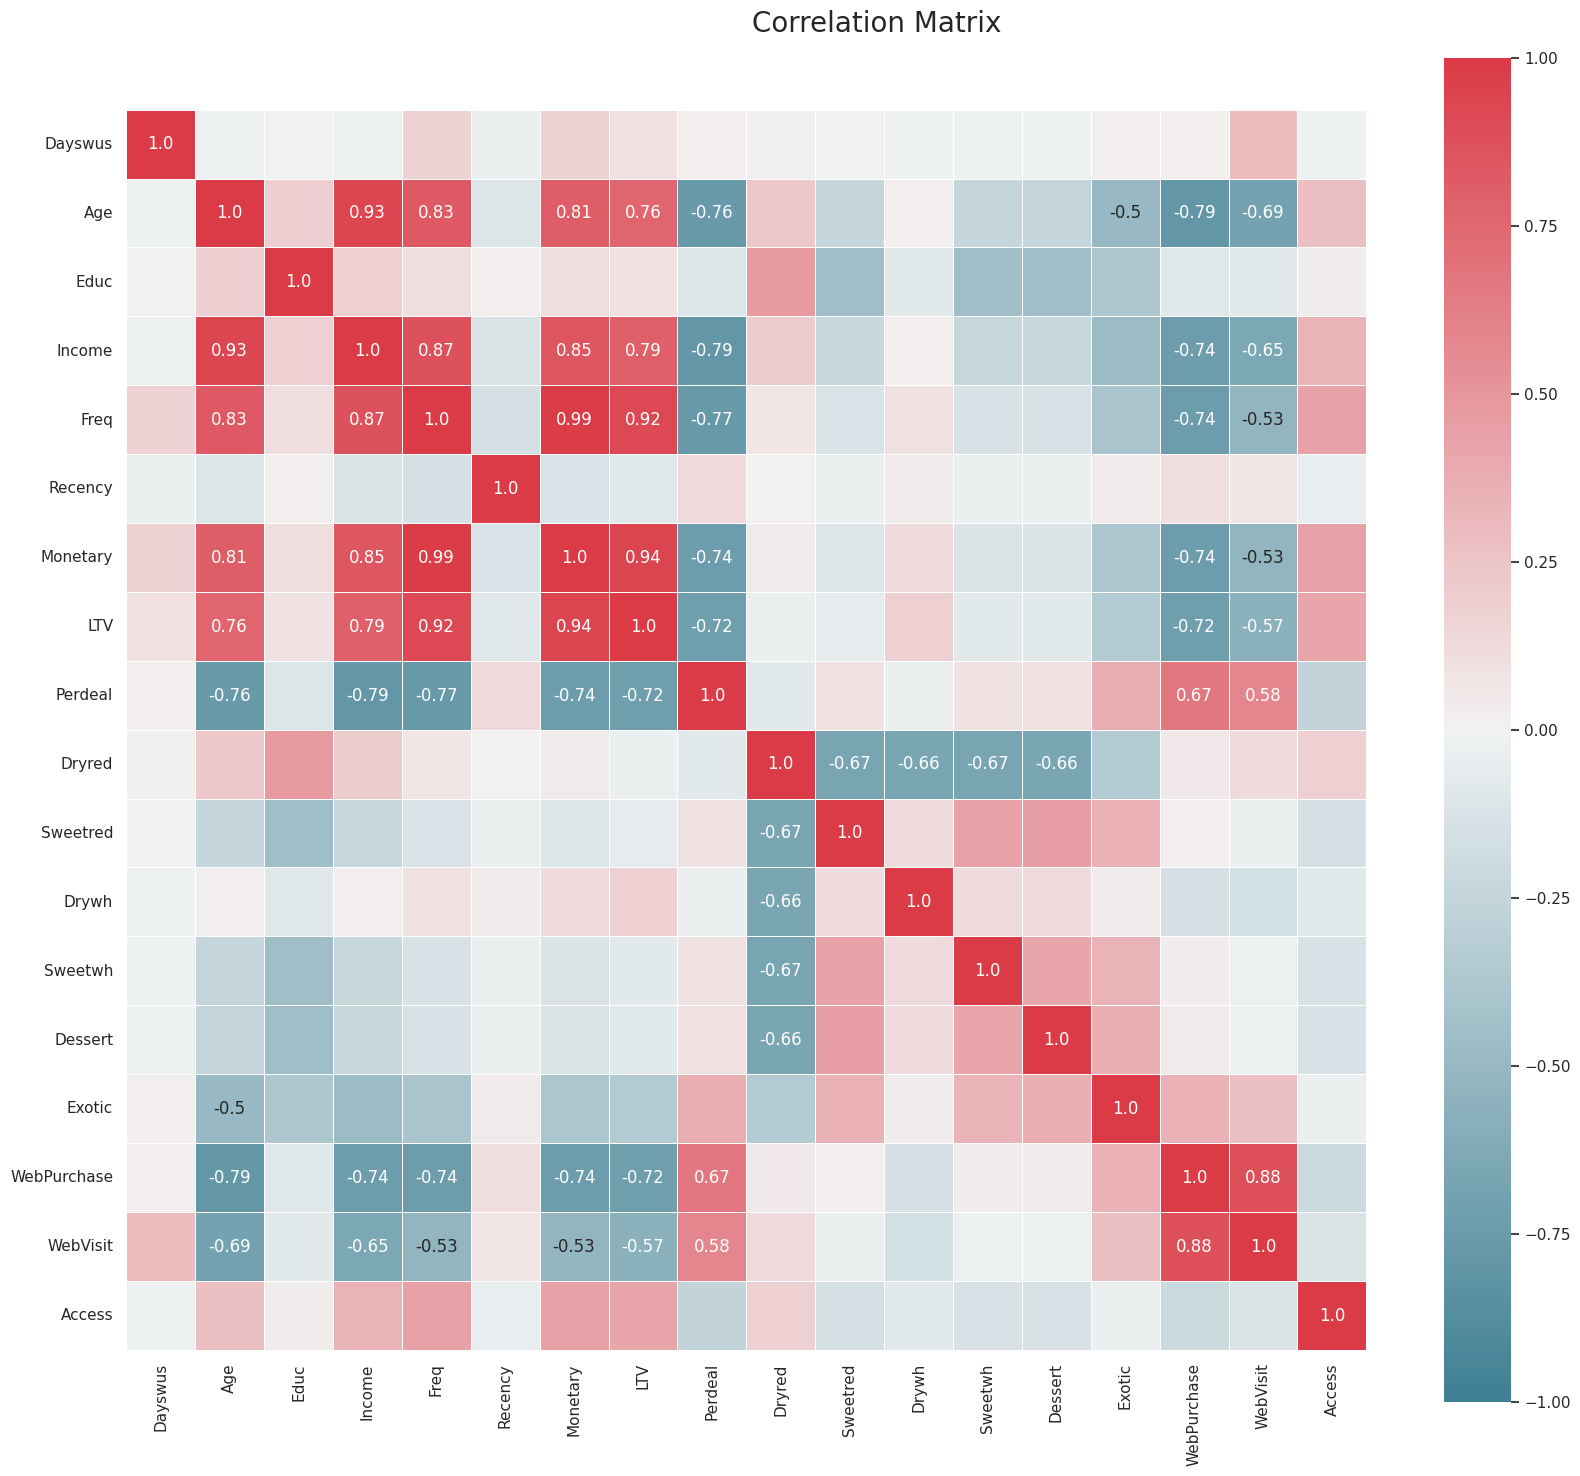

In [124]:
## Assuming 'df' is your DataFrame and 'metric_variables' is a list of metric column names
plot_corr_matrix(df, metric_variables)

**CONCLUSION:**
Dayswus appears to have no apparent relationship with the other variables.
Education level (Educ) seems to exhibit no discernible relationship with the other variables.
Recency doesn't seem to exhibit any evident correlation with the other variables.
Freq, Monetary, and LTV display a notably strong correlation among themselves, suggesting redundancy where one of the variables could potentially be eliminated to avoid multicollinearity.
Webvisit and Web Purchase exhibit a significant correlation; hence, eliminating one variable (Webvisit) could be considered due to its weaker correlation with the other variables.



## 2.10 - DBScan

In [114]:
# Define the list of features for data mining analysis
features = ['Age', 'Income', 'Freq',  'Recency',  'Monetary','LTV', 'Perdeal', 'WebPurchase','Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert']

In [115]:
def plot_kdist_graph(df, feats, n_neighbors=20):
    """
    Plots the K-distance graph to determine the right epsilon (eps) value for DBSCAN clustering.

    Parameters:
    - df: DataFrame containing the data points.
    - feats: List of feature columns to consider for distance calculation.
    - n_neighbors: Number of nearest neighbors to consider for average distance calculation.

    This function calculates the average distance to the n_neighbors for each data point
    and plots the sorted distances to help identify an appropriate epsilon value for DBSCAN clustering.

    Args:
        df (DataFrame): The data frame containing the data points.
        feats (list): List of feature columns to consider for distance calculation.
        n_neighbors (int): Number of nearest neighbors to consider for average distance calculation.

    Returns:
        None
    """
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    neigh.fit(df[feats])
    distances, _ = neigh.kneighbors(df[feats])

    # We sort the average distances of the points and plot this
    distances = np.sort(distances[:, -1])
    plt.ylabel("%d-NN Distance" % n_neighbors)
    plt.xlabel("Points sorted by distance")
    plt.plot(distances)
    plt.title(str(feats))
    plt.show()

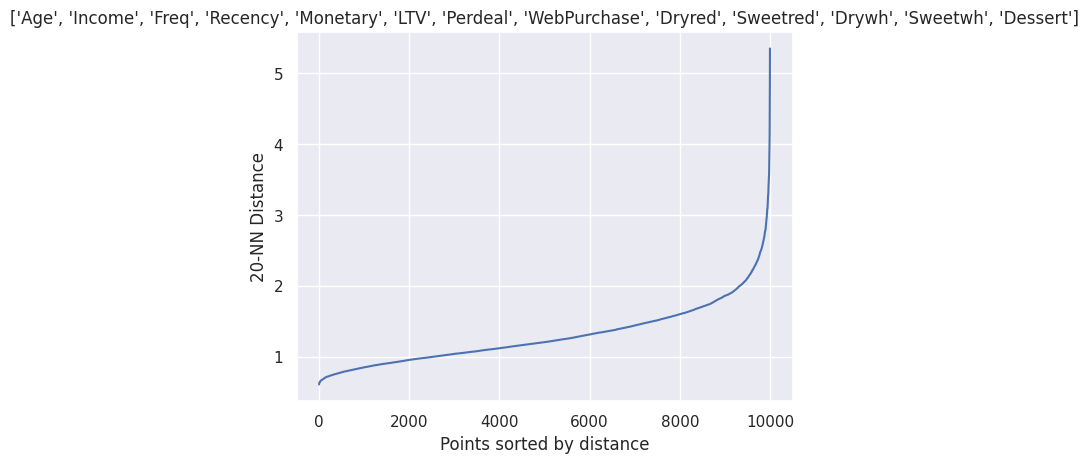

In [116]:
## The "Knee" or the threshold before we get very large distances (y-axis) is at around 0.80 and 0.90
plot_kdist_graph(df, features)

In [117]:
## Create a DBSCAN clustering model with specified hyperparameters
dbscan = DBSCAN(eps=1.9, min_samples=16, n_jobs=4)

## Fit the DBSCAN model to the data and predict cluster labels
dbscan_labels = dbscan.fit_predict(df[features])

## Print information about the clustering results
print("Points in cluster -1 are noise rows.")
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/df.shape[0],2))

Points in cluster -1 are noise rows.
Counter of cluster labels     : Counter({0: 9771, -1: 229})
Percentage of noise rows      : 2.29


In [118]:
def split_noise_rows(df, feats, dbs_model):
  ## Predict cluster labels using the provided DBSCAN model
  dbscan_labels = dbs_model.fit_predict(df[feats])

  ## Concatenate cluster labels with the original DataFrame
  df_concat = pd.concat([df,
                         pd.Series(dbscan_labels,
                                   name='dbscan_labels',
                                   index=df.index)],
                            axis=1)

  ## Create separate DataFrames for noise and non-noise rows
  df_noise = df_concat[df_concat['dbscan_labels']==-1].copy()
  df_nonoise = df_concat[df_concat['dbscan_labels']==0].copy()

  return df_noise, df_nonoise, df_concat

In [119]:
## Create a DBSCAN clustering model with previously tuned hyperparameters
dbscan = DBSCAN(eps=1.9, min_samples=16, n_jobs=4)

## Use the 'split_noise_rows' function to separate data into noise and non-noise rows
df_noise, df_nonoise, df_combined_noise = split_noise_rows(df, features, dbscan)

In [120]:
## Calculate and print the number and percentage of noise rows
print("There are %d noise rows (%f pct)" % (df_noise.shape[0], 100*df_noise.shape[0]/df_combined_noise.shape[0]))

## Calculate and print the number and percentage of non-noise rows
print("There are %d non-noise rows (%f pct)" % (df_nonoise.shape[0], 100*df_nonoise.shape[0]/df_combined_noise.shape[0]))

There are 229 noise rows (2.290000 pct)
There are 9771 non-noise rows (97.710000 pct)


In [121]:
## Check the shape of the 'df_combined_noise' dataframe
print(df_combined_noise.shape)

## Check the shape of the 'df' dataframe (formerly 'df_nonoise')
print(df_nonoise.shape)

## Check the shape of the 'df_noise' dataframe
print(df_noise.shape)

(10000, 22)
(9771, 22)
(229, 22)


In [122]:
df = df_nonoise.copy()

# 3 - CLUSTERING

In [127]:
# Remove 'Dayswus', 'Educ', and 'WebVisit' based on the correlation matrix for demographic features
demographic_features = ['Age', 'Income', 'Freq',  'Recency',  'Monetary','LTV', 'Perdeal', 'WebPurchase']
df_dem = df[demographic_features].copy()

# Remove 'Exotic' and 'Access' based on the correlation matrix for preference features
preference_features = ['Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert']
df_prf = df[preference_features].copy()

## 3.1 - Testing different clustering solutions

In [128]:
## Set up the KMeans clusterer
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

# Set up the AgglomerativeClustering (Hierarchical clustering) clusterer
hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

In [129]:
def get_ss(df):
    """
    Compute the Sum of Squares (SS) for each variable within a given dataset.

    Parameters:
    df (DataFrame): The input dataset.

    Returns:
    float: The computed sum of squares.
    """
    # Compute the sum of squares for each variable
    ss = np.sum(df.var() * (df.count() - 1))
    return ss

def r2(df, labels):
    """
    Calculate the R-squared score for clustering evaluation.

    Parameters:
    df (DataFrame): The input dataset.
    labels (array-like): Cluster labels assigned by a clustering algorithm.

    Returns:
    float: The computed R-squared score.
    """
    ## Compute total sum of squares (SST) and within-cluster sum of squares (SSW)
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst

def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Compute R-squared scores for different numbers of clusters (k) using a clustering algorithm.

    Parameters:
    df (DataFrame): The input dataset.
    clusterer : A clustering algorithm compatible with scikit-learn.
    min_k (int): The minimum number of clusters to consider (default is 2).
    max_k (int): The maximum number of clusters to consider (default is 10).

    Returns:
    dict: Dictionary with k as keys and corresponding R-squared scores as values.
    """
    r2_clust = {}

    ## Loop over different values of k and compute R-squared scores
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)  ## Clone the clusterer with 'n_clusters' parameter set to 'n'
        labels = clust.fit_predict(df)  ## Fit the clusterer and obtain labels
        r2_clust[n] = r2(df, labels)  ## Calculate R-squared score for the current 'n_clusters'
    return r2_clust

In [130]:
def get_r2_df(df, feats, kmeans_model, hierar_model):

  r2_scores = {}
  r2_scores['kmeans'] = get_r2_scores(df[feats], kmeans_model)

  for linkage in ['complete', 'average', 'single', 'ward']:
      r2_scores[linkage] = get_r2_scores(
          df[feats], hierar_model.set_params(linkage=linkage)
      )

  return pd.DataFrame(r2_scores)

In [131]:
def plot_r2_scores(r2_scores,
                   plot_title,
                   legend_title="Cluster methods"):
    """
    Visualize R-squared scores for different cluster solutions based on demographic variables.

    Parameters:
    r2_scores (DataFrame): DataFrame containing R-squared scores for cluster solutions.
    plot_title (str): Title for the plot.
    legend_title (str): Title for the legend (default is 'Cluster methods').

    Returns:
    None
    """
    ## Create a line plot to visualize R-squared scores for each cluster solution
    pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

    ## Set plot title, legend title, and axis labels
    plt.title(plot_title, fontsize=21)
    plt.legend(title=legend_title, title_fontsize=11)
    plt.xlabel("Number of clusters", fontsize=13)
    plt.ylabel("R² metric", fontsize=13)
    plt.show()

#### 3.1.1 - Finding the optimal cluster on demographic variables

In [132]:
## Compute R-squared scores for different clustering methods based on demographic features.
## Note: The execution of get_r2_df function might take a few minutes.
demog_r2_scores = get_r2_df(df, demographic_features, kmeans, hierarchical)

## Output the computed R-squared scores for demographic clustering solutions.
demog_r2_scores

,kmeans,complete,average,single,ward
2,0.579279,0.566763,0.075037,0.000459,0.570603
3,0.695874,0.603757,0.504171,0.001042,0.664310
4,0.755224,0.662307,0.725032,0.001192,0.720207
5,0.792875,0.732056,0.725127,0.001719,0.769249
6,0.812400,0.782735,0.725211,0.001886,0.788641
7,0.827411,0.789886,0.725367,0.002308,0.804664
8,0.839687,0.791001,0.735264,0.002695,0.818454
9,0.848938,0.797707,0.740831,0.003582,0.827150


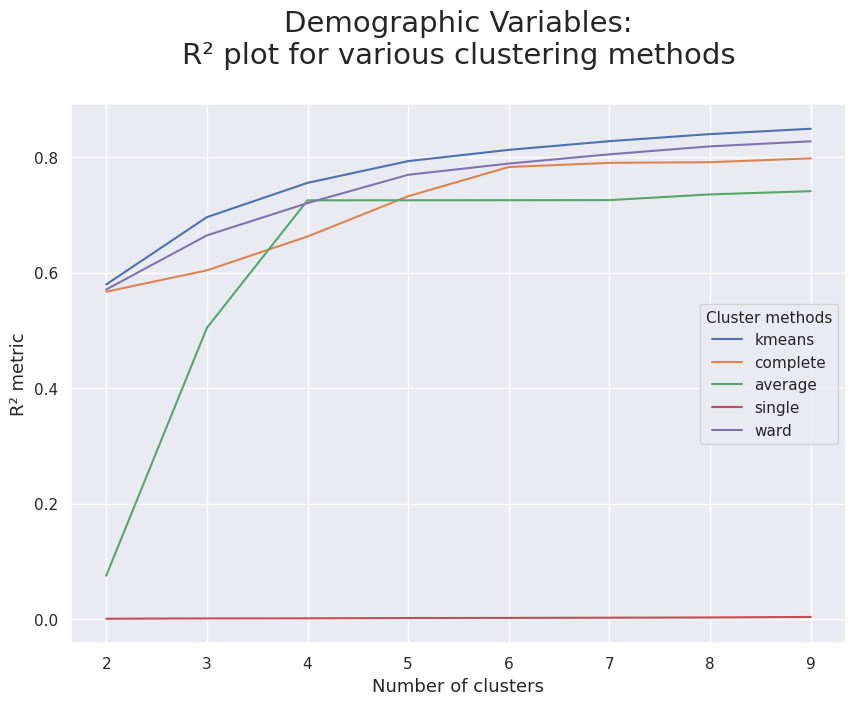

In [133]:
## Plot R-squared scores for different clustering methods based on demographic features
plot_r2_scores(demog_r2_scores, plot_title = "Demographic Variables:\nR² plot for various clustering methods\n")

#### 3.1.2 - Finding the optimal cluster on preference variables

In [134]:
## Compute R-squared scores for different clustering methods based on preference features.
## Note: The execution of get_r2_df function might take a few minutes.
pref_r2_scores = get_r2_df(df, preference_features, kmeans, hierarchical)

## Output the computed R-squared scores for demographic clustering solutions.
pref_r2_scores

,kmeans,complete,average,single,ward
2,0.393318,0.123218,0.258529,0.000717,0.334559
3,0.557249,0.214240,0.259757,0.001209,0.482995
4,0.616073,0.233297,0.304608,0.001960,0.576118
5,0.661454,0.239099,0.316833,0.003464,0.618816
6,0.695416,0.531492,0.335084,0.004214,0.657892
7,0.722121,0.608679,0.337395,0.006047,0.684002
8,0.741797,0.631324,0.352083,0.007283,0.709646
9,0.759343,0.638628,0.358135,0.008254,0.722824


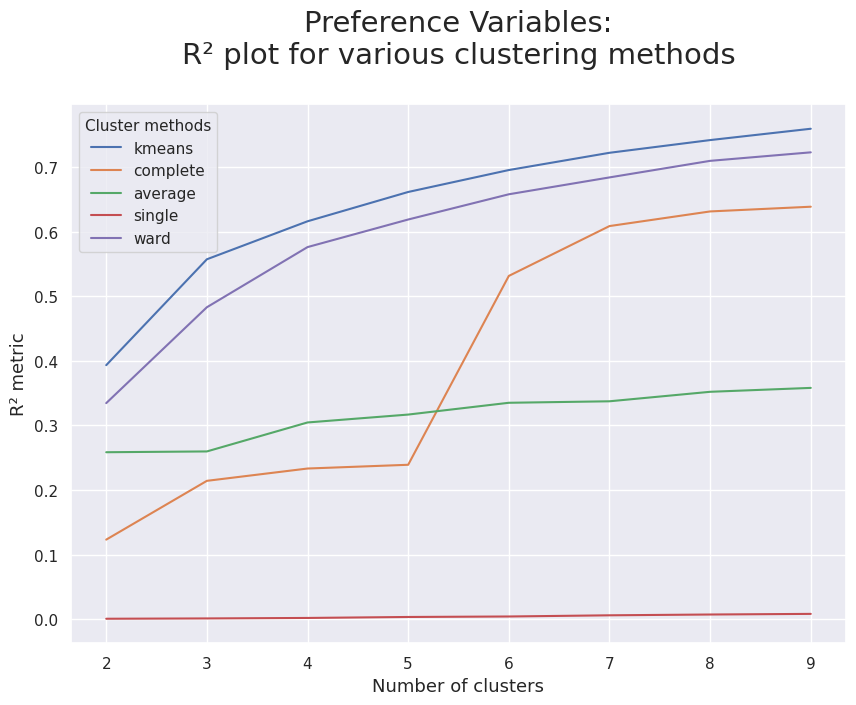

In [135]:
## Plotting R-squared scores for various clustering methods using preference variables
plot_r2_scores(pref_r2_scores,plot_title = "Preference Variables:\nR² plot for various clustering methods\n")

## 3.2 - Clustering in Depth

In [136]:
def plot_dendrogram(df, demographic_features,
                    linkage='ward', distance='euclidean',
                    y_threshold = 75):

    """
    Plot a dendrogram visualizing hierarchical clustering on demographic features.

    Parameters:
    df (DataFrame): The input dataset.
    demographic_features (list): List of demographic features for clustering.
    linkage (str): Linkage method for hierarchical clustering (default is 'ward').
    distance (str): Distance metric for clustering (default is 'euclidean').
    y_threshold (int): Threshold to color branches above the given height (default is 75).

    Returns:
    None
    """
    ## Initialize AgglomerativeClustering with specified parameters
    hclustering_dem = AgglomerativeClustering(linkage=linkage,
                                    metric=distance,
                                    distance_threshold=0,
                                    n_clusters=None)

    hclustering_dem.fit_predict(df[demographic_features])


    ## Calculate counts of samples under each node
    counts = np.zeros(hclustering_dem.children_.shape[0])
    n_samples = len(hclustering_dem.labels_)

    for i, merge in enumerate(hclustering_dem.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count



    ## Create linkage matrix for dendrogram

    linkage_matrix = np.column_stack(
        [hclustering_dem.children_, hclustering_dem.distances_, counts]
    ).astype(float)


    ## Plot the dendrogram
    sns.set()
    fig = plt.figure(figsize=(11,5))

    dendrogram(linkage_matrix,
              truncate_mode='level',
              p=5,
              color_threshold=y_threshold,
              above_threshold_color='k')

    ## Plot threshold line
    plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")

    ## Set title and axis labels
    plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram ', fontsize=15)
    plt.xlabel('Number of points in node (or index of point if no parenthesis)')
    plt.ylabel(f'{distance.title()} Distance', fontsize=13)
    plt.show()

In [137]:
# FUNÇÃO PARA DEFINIR MÉDIAS POR LABEL
def get_mean_bylabel(df, feats, label_name):
    # Characterize clusters by computing means of specified features grouped by labels

  return df[feats+[label_name]].groupby(label_name).mean()


    ## Calculate means of specified features grouped by a given label.

    ##Parameters:
    ##df (DataFrame): The input dataset.
    ##feats (list): List of features for which means are calculated.
    ##label_name (str): The column name representing the labels.

    ##Returns:
    ##DataFrame: Mean values of specified features grouped by the label column.


In [138]:
def plot_inertia(df, feats, max_k=10):
    """
    Plot the inertia (Sum of Squares within clusters) for different numbers of clusters using KMeans.

    Parameters:
    df (DataFrame): The input dataset.
    feats (list): List of features used for clustering.
    max_k (int): Maximum number of clusters to consider (default is 10).

    Returns:
    None
    """
    ## Range of clusters to explore
    range_clusters = range(1, max_k+1)

    inertia = []
    for n_clus in range_clusters:
        ## Initialize KMeans with specified parameters and fit on the data
        kmclustering_dem = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=28)
        kmclustering_dem.fit(df[feats])
        inertia.append(kmclustering_dem.inertia_)


    ## Plotting the inertia values
    plt.figure(figsize=(9,5))
    plt.plot(range_clusters, inertia)
    plt.ylabel("Inertia: SSw")
    plt.xlabel("Number of clusters")
    plt.xticks(range_clusters)
    plt.title("Inertia plot over clusters", size=15)
    plt.show()


### 3.2.1 - In depth Analysis (**Demographic** **Features**)

#### 3.2.1.1 - Hierarchical Clustering

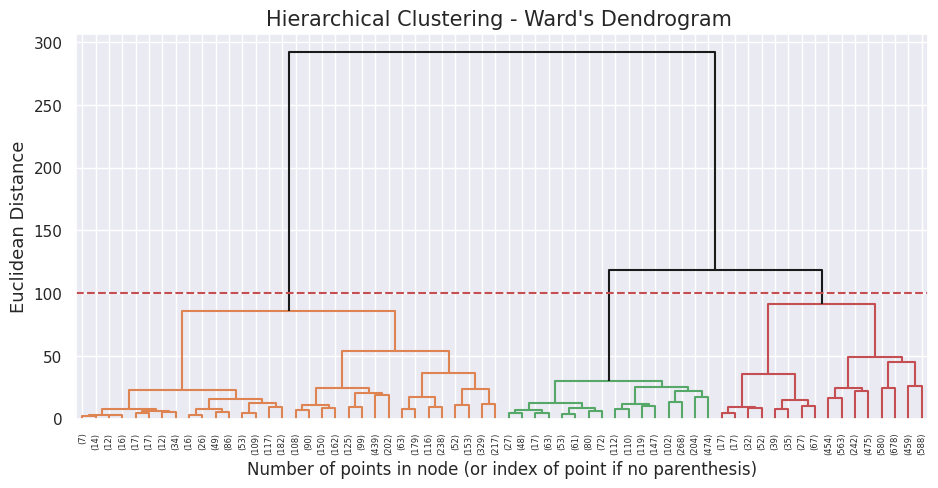

In [139]:
## Visualize a dendrogram for hierarchical clustering based on demographic features with a specified threshold for coloring branches above a certain height
plot_dendrogram(df, demographic_features, y_threshold=100)

In [140]:
## Implementing a 4-cluster solution obtained from dendrogram analysis
linkage = 'ward'
distance = 'euclidean'
hc4_dem = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=3)

## Fit the AgglomerativeClustering model to demographic features (df_dem) and obtain cluster labels
hc4_dem_labels = hc4_dem.fit_predict(df[demographic_features])

In [141]:
## Adding the obtained hierarchical clustering labels (4-cluster solution) to the DataFrame
df = pd.concat((df, pd.Series(hc4_dem_labels,
                                  name='hc_dem_labels',
                                  index=df.index)),
                        axis=1)

In [142]:
## Calculate the mean values of demographic features grouped by hierarchical clustering labels
df_hclustering_dem_final = get_mean_bylabel(df, demographic_features, 'hc_dem_labels')

## Apply background gradient to the DataFrame for visual emphasis on feature-wise differences
df_hclustering_dem_final.style.background_gradient(axis=0)

,Age,Income,Freq,Recency,Monetary,LTV,Perdeal,WebPurchase
hc_dem_labels,,,,,,,,
0,-0.894616,-0.883351,-0.834244,0.092252,-0.791506,-0.722121,0.903590,0.741174
1,1.059313,1.058000,1.150978,-0.194596,1.151820,1.118142,-0.959012,-0.993877
2,0.190943,0.162319,-0.131293,-0.150348,-0.239566,-0.353284,-0.331099,0.096750


#### 3.2.1.2 - K-Means Clustering

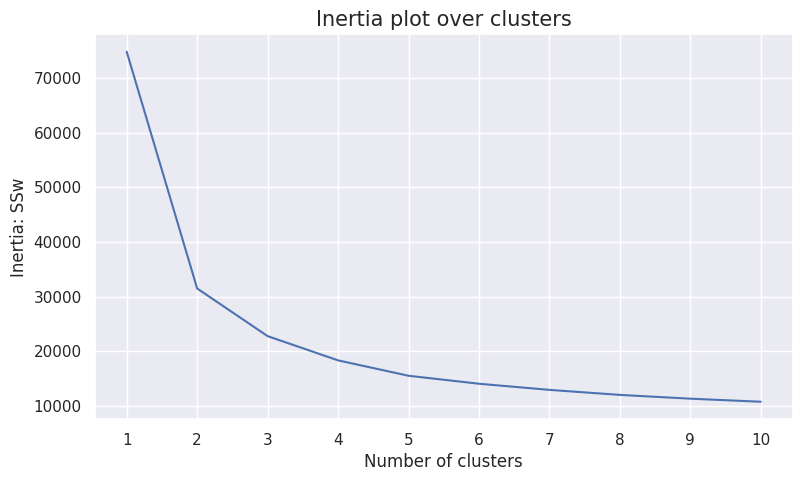

In [143]:
## Plot the inertia (SSw) values for different numbers of clusters using KMeans to analyze clustering performance on demographic features
plot_inertia(df, demographic_features)

In [144]:
def plot_silhouette_score(df, demographic_features, max_k=10):
    """
    Plot the average silhouette score for different numbers of clusters using KMeans.

    Parameters:
    df (DataFrame): The input dataset.
    demographic_features (list): List of demographic features used for clustering.
    max_k (int): Maximum number of clusters to consider (default is 10).

    Returns:
    None
    """
    range_clusters = range(2, max_k+1)
    ## Skip nclus == 1

    ## Storing average silhouette metric
    avg_silhouette = []
    for nclus in range_clusters:
        ## Initialize KMeans object with n_clusters value and random seed for reproducibility
        kmclustering_dem = KMeans(n_clusters=nclus, init='k-means++', n_init=20, random_state=28)
        cluster_labels = kmclustering_dem.fit_predict(df[demographic_features])

        ## Compute silhouette_score for evaluating clustering quality
        silhouette_avg = silhouette_score(df[demographic_features], cluster_labels)
        avg_silhouette.append(silhouette_avg)
        print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    ## Plotting the average silhouette values
    plt.figure(figsize=(9,5))
    plt.plot(range_clusters, avg_silhouette)
    plt.ylabel("Average silhouette")
    plt.xlabel("Number of clusters")
    plt.xticks(range_clusters)
    plt.title("Average silhouette plot over clusters", size=15)
    plt.show()

For n_clusters = 2, the average silhouette_score is : 0.48624954503919554
For n_clusters = 3, the average silhouette_score is : 0.3756041962643159
For n_clusters = 4, the average silhouette_score is : 0.39719533510237154
For n_clusters = 5, the average silhouette_score is : 0.320151790706443
For n_clusters = 6, the average silhouette_score is : 0.2539265762907851
For n_clusters = 7, the average silhouette_score is : 0.2268931889045665
For n_clusters = 8, the average silhouette_score is : 0.22439524610561756
For n_clusters = 9, the average silhouette_score is : 0.22332567444028523
For n_clusters = 10, the average silhouette_score is : 0.21592318678683356


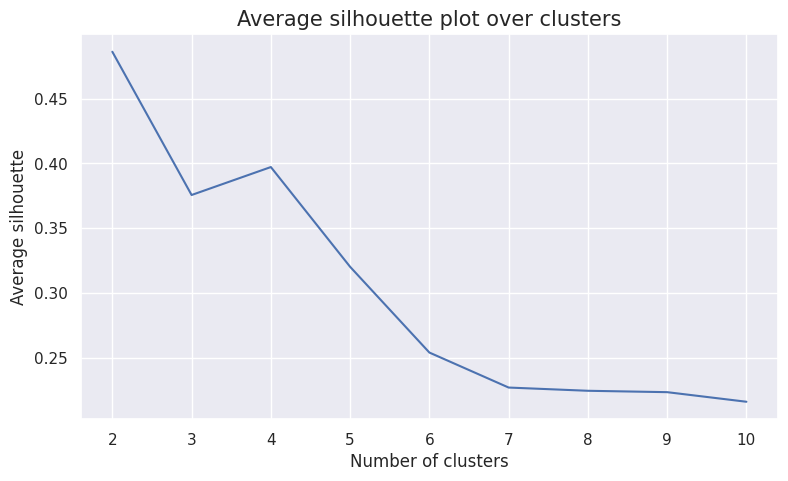

In [145]:
## Plot the average silhouette scores to determine the optimal number of clusters
plot_silhouette_score(df, demographic_features)

In [146]:
## Derive the final cluster solution using KMeans with 4 clusters
number_clusters = 3
kmclustering_dem = KMeans(n_clusters=number_clusters, init='k-means++', n_init=20, random_state=28)

# Fit the KMeans model to demographic features and obtain cluster labels
km_dem_labels = kmclustering_dem.fit_predict(df[demographic_features])

# Display the resulting cluster labels
km_dem_labels

array([2, 2, 1, ..., 2, 2, 1], dtype=int32)

In [147]:
# Adding KMeans cluster labels (4 clusters) to the DataFrame
df = pd.concat((df, pd.Series(km_dem_labels, name='km_dem_labels', index=df.index)),
                        axis=1)

# Display the updated DataFrame including KMeans cluster labels
df

,Custid,Dayswus,Age,Educ,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Access,dbscan_labels,hc_dem_labels,km_dem_labels
0,1001,-0.538821,1.160147,-0.393917,0.756139,0,0,1.200813,0.051426,1.204514,...,1.230096,0.365604,-0.500993,-0.843437,-1.262136,-0.522070,1.398495,0,1,2
1,1002,-1.358645,1.738120,1.737959,1.561656,0,0,1.367919,-0.807302,1.413136,...,0.753274,-0.383022,-0.627910,-0.843437,-1.802060,-1.809436,-0.456273,0,1,2
2,1003,-1.556192,-1.382933,0.672021,-1.505218,1,0,-0.888008,0.094363,-0.894070,...,-0.359309,-0.757335,2.164268,2.693449,0.897558,0.765296,1.398495,0,0,1
3,1004,-0.025197,0.639972,1.204990,0.857150,0,1,0.532390,-0.750053,0.410205,...,-0.756660,-0.133480,-0.247159,-0.089675,-0.398259,-0.092948,-0.456273,0,1,0
4,1005,0.809442,0.639972,0.672021,0.794892,0,1,0.866602,-0.521059,0.796542,...,-0.041428,-0.383022,-0.374076,0.142252,-0.452251,0.336174,-0.456273,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10996,0.340266,-1.151744,0.139052,-0.565443,0,0,0.699496,0.137299,0.600283,...,0.594334,-0.757335,0.514345,1.475832,-0.614228,0.336174,-0.456273,0,1,0
9996,10997,-1.289503,1.622525,-0.926887,2.030276,0,1,1.535024,0.180236,1.615577,...,-0.279839,-0.258251,-0.120241,-0.901419,0.141665,-0.092948,3.253262,0,1,2
9997,10998,-1.541376,1.217944,1.204990,1.076520,0,0,1.284366,0.509415,1.308053,...,0.038042,0.490375,0.895096,-0.727474,-1.316129,-0.951192,-0.456273,0,1,2
9998,10999,-1.482112,0.986755,-1.459856,1.489039,1,0,1.117260,-0.835926,1.124156,...,-0.120898,0.116062,-0.754827,-0.495547,-0.344266,-0.522070,-0.456273,0,1,2


In [148]:
# Calculate the mean values of demographic features grouped by KMeans cluster labels
df_kmeans_dem_means = get_mean_bylabel(df, demographic_features, 'km_dem_labels')

# Apply background gradient to the DataFrame for visual emphasis on feature-wise differences
df_kmeans_dem_means.style.background_gradient(axis=0)

,Age,Income,Freq,Recency,Monetary,LTV,Perdeal,WebPurchase
km_dem_labels,,,,,,,,
0,0.368694,0.350328,0.126391,-0.185913,0.015105,-0.119067,-0.490216,-0.116382
1,-0.890935,-0.886019,-0.846174,0.090089,-0.801086,-0.726345,0.904600,0.747664
2,1.233459,1.243230,1.444113,-0.165988,1.495560,1.515811,-1.053040,-1.244435


### 3.2.2 - In depth Analysis (**Preference** **Features**)

#### 3.2.2.1 - Hierarchical Clustering

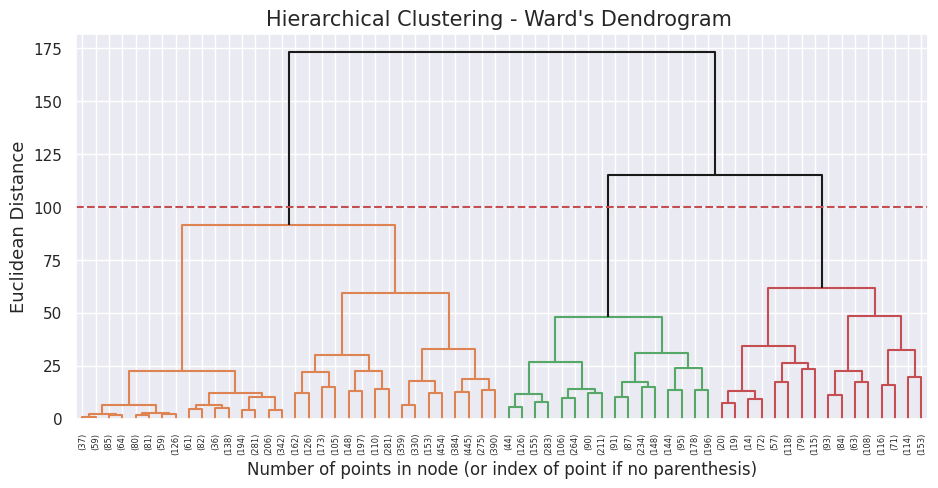

In [149]:
## Visualize a dendrogram for hierarchical clustering based on preference features with a specified threshold for coloring branches above a certain height
plot_dendrogram(df, preference_features, y_threshold=100)

In [150]:
## Implementing a 3-cluster solution using hierarchical clustering on preference features
linkage = 'ward'
distance = 'euclidean'
hc_pref = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=3)

## Fit the AgglomerativeClustering model to preference features (df[preference_features])
hc_pref_labels = hc_pref.fit_predict(df[preference_features])

In [151]:
## Adding hierarchical clustering labels (3 clusters) based on preference features to the DataFrame
df = pd.concat((df, pd.Series(hc_pref_labels,
                                  name='hc_pref_labels',
                                  index=df.index)),
                        axis=1)

## Display the updated DataFrame with hierarchical clustering labels
df

,Custid,Dayswus,Age,Educ,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Access,dbscan_labels,hc_dem_labels,km_dem_labels,hc_pref_labels
0,1001,-0.538821,1.160147,-0.393917,0.756139,0,0,1.200813,0.051426,1.204514,...,0.365604,-0.500993,-0.843437,-1.262136,-0.522070,1.398495,0,1,2,2
1,1002,-1.358645,1.738120,1.737959,1.561656,0,0,1.367919,-0.807302,1.413136,...,-0.383022,-0.627910,-0.843437,-1.802060,-1.809436,-0.456273,0,1,2,0
2,1003,-1.556192,-1.382933,0.672021,-1.505218,1,0,-0.888008,0.094363,-0.894070,...,-0.757335,2.164268,2.693449,0.897558,0.765296,1.398495,0,0,1,1
3,1004,-0.025197,0.639972,1.204990,0.857150,0,1,0.532390,-0.750053,0.410205,...,-0.133480,-0.247159,-0.089675,-0.398259,-0.092948,-0.456273,0,1,0,0
4,1005,0.809442,0.639972,0.672021,0.794892,0,1,0.866602,-0.521059,0.796542,...,-0.383022,-0.374076,0.142252,-0.452251,0.336174,-0.456273,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10996,0.340266,-1.151744,0.139052,-0.565443,0,0,0.699496,0.137299,0.600283,...,-0.757335,0.514345,1.475832,-0.614228,0.336174,-0.456273,0,1,0,2
9996,10997,-1.289503,1.622525,-0.926887,2.030276,0,1,1.535024,0.180236,1.615577,...,-0.258251,-0.120241,-0.901419,0.141665,-0.092948,3.253262,0,1,2,0
9997,10998,-1.541376,1.217944,1.204990,1.076520,0,0,1.284366,0.509415,1.308053,...,0.490375,0.895096,-0.727474,-1.316129,-0.951192,-0.456273,0,1,2,0
9998,10999,-1.482112,0.986755,-1.459856,1.489039,1,0,1.117260,-0.835926,1.124156,...,0.116062,-0.754827,-0.495547,-0.344266,-0.522070,-0.456273,0,1,2,0


In [152]:
## Calculate the mean values of preference features grouped by hierarchical clustering labels
df_hclustering_pref_final = get_mean_bylabel(df, preference_features, 'hc_pref_labels')

# Apply background gradient to the DataFrame for visual emphasis on feature-wise differences
df_hclustering_pref_final.style.background_gradient(axis=0)

,Dryred,Sweetred,Drywh,Sweetwh,Dessert
hc_pref_labels,,,,,
0,0.640089,-0.401586,-0.480632,-0.362203,-0.369187
1,-1.338460,1.520067,-0.128134,1.445316,1.201519
2,-0.731532,0.050102,1.277869,-0.023110,0.111284


#### 3.2.2.2 - K-Means Clustering

In [153]:
## Implement KMeans clustering with a better initialization method ('k-means++')
## Using 20 different initializations for improved convergence
## Setting random_state for result reproducibility
kmclustering_pref = KMeans(n_clusters=3,
                 init='k-means++',  ## notice different initialization algorithm
                 n_init=20,         ## notice different value
                 random_state=28)    ## why set random_state?

## Fit the KMeans model to preference features and predict cluster labels
kmclustering_pref.fit(df[preference_features])
kmclustering_pref.predict(df[preference_features])

array([2, 2, 0, ..., 2, 2, 0], dtype=int32)

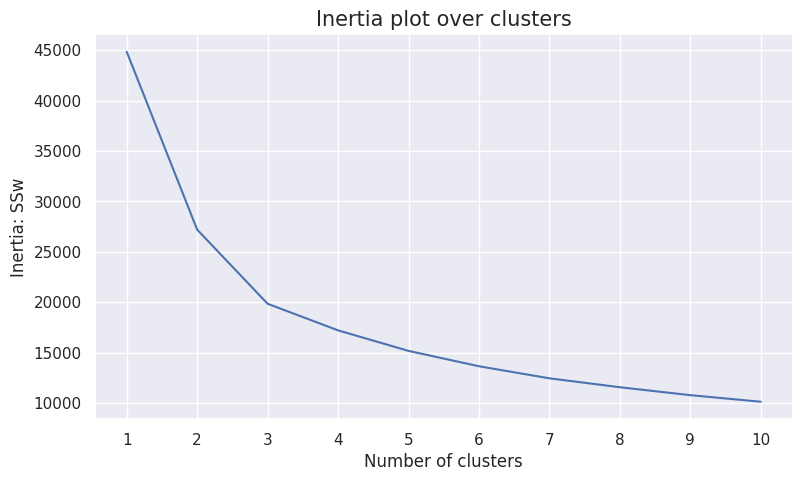

In [154]:
## Plotting inertia values for different numbers of clusters using KMeans to analyze clustering performance on preference features
plot_inertia(df, preference_features)

For n_clusters = 2, the average silhouette_score is : 0.3711792489287685
For n_clusters = 3, the average silhouette_score is : 0.3572403970549646
For n_clusters = 4, the average silhouette_score is : 0.2866594750922153
For n_clusters = 5, the average silhouette_score is : 0.2918772896902149
For n_clusters = 6, the average silhouette_score is : 0.2965544278831824
For n_clusters = 7, the average silhouette_score is : 0.2953994191640279
For n_clusters = 8, the average silhouette_score is : 0.25973238160049744
For n_clusters = 9, the average silhouette_score is : 0.26128452331901353
For n_clusters = 10, the average silhouette_score is : 0.26158581818421195


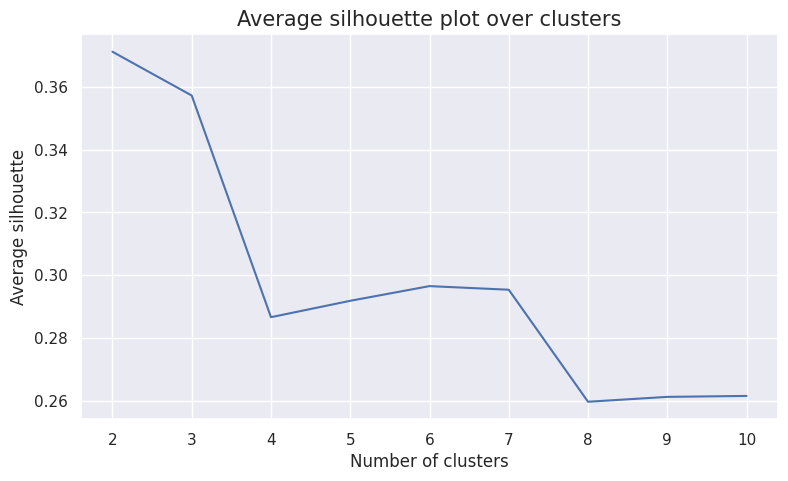

In [155]:
## Plot the average silhouette scores to assess clustering quality
plot_silhouette_score(df, preference_features)

In [156]:
## Deriving the final cluster solution using KMeans with 3 clusters
number_clusters = 3
kmclustering_pref = KMeans(n_clusters=number_clusters, init='k-means++', n_init=20, random_state=28)

## Fit the KMeans model to preference features and obtain cluster labels
km_pref_labels = kmclustering_pref.fit_predict(df[preference_features])

## Displaying the resulting cluster labels
km_pref_labels

array([2, 2, 0, ..., 2, 2, 0], dtype=int32)

In [157]:
## Adding KMeans cluster labels (3 clusters) based on preference features to the DataFrame
df = pd.concat((df, pd.Series(km_pref_labels, name='km_pref_labels', index=df.index)),
                        axis=1)

## Display the updated DataFrame with KMeans cluster labels
df

,Custid,Dayswus,Age,Educ,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,Dessert,Exotic,WebPurchase,WebVisit,Access,dbscan_labels,hc_dem_labels,km_dem_labels,hc_pref_labels,km_pref_labels
0,1001,-0.538821,1.160147,-0.393917,0.756139,0,0,1.200813,0.051426,1.204514,...,-0.500993,-0.843437,-1.262136,-0.522070,1.398495,0,1,2,2,2
1,1002,-1.358645,1.738120,1.737959,1.561656,0,0,1.367919,-0.807302,1.413136,...,-0.627910,-0.843437,-1.802060,-1.809436,-0.456273,0,1,2,0,2
2,1003,-1.556192,-1.382933,0.672021,-1.505218,1,0,-0.888008,0.094363,-0.894070,...,2.164268,2.693449,0.897558,0.765296,1.398495,0,0,1,1,0
3,1004,-0.025197,0.639972,1.204990,0.857150,0,1,0.532390,-0.750053,0.410205,...,-0.247159,-0.089675,-0.398259,-0.092948,-0.456273,0,1,0,0,1
4,1005,0.809442,0.639972,0.672021,0.794892,0,1,0.866602,-0.521059,0.796542,...,-0.374076,0.142252,-0.452251,0.336174,-0.456273,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10996,0.340266,-1.151744,0.139052,-0.565443,0,0,0.699496,0.137299,0.600283,...,0.514345,1.475832,-0.614228,0.336174,-0.456273,0,1,0,2,2
9996,10997,-1.289503,1.622525,-0.926887,2.030276,0,1,1.535024,0.180236,1.615577,...,-0.120241,-0.901419,0.141665,-0.092948,3.253262,0,1,2,0,1
9997,10998,-1.541376,1.217944,1.204990,1.076520,0,0,1.284366,0.509415,1.308053,...,0.895096,-0.727474,-1.316129,-0.951192,-0.456273,0,1,2,0,2
9998,10999,-1.482112,0.986755,-1.459856,1.489039,1,0,1.117260,-0.835926,1.124156,...,-0.754827,-0.495547,-0.344266,-0.522070,-0.456273,0,1,2,0,2


In [158]:
## Display the first few rows of the updated DataFrame 'df'
df.head()

,Custid,Dayswus,Age,Educ,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,Dessert,Exotic,WebPurchase,WebVisit,Access,dbscan_labels,hc_dem_labels,km_dem_labels,hc_pref_labels,km_pref_labels
0,1001,-0.538821,1.160147,-0.393917,0.756139,0,0,1.200813,0.051426,1.204514,...,-0.500993,-0.843437,-1.262136,-0.522070,1.398495,0,1,2,2,2
1,1002,-1.358645,1.738120,1.737959,1.561656,0,0,1.367919,-0.807302,1.413136,...,-0.627910,-0.843437,-1.802060,-1.809436,-0.456273,0,1,2,0,2
2,1003,-1.556192,-1.382933,0.672021,-1.505218,1,0,-0.888008,0.094363,-0.894070,...,2.164268,2.693449,0.897558,0.765296,1.398495,0,0,1,1,0
3,1004,-0.025197,0.639972,1.204990,0.857150,0,1,0.532390,-0.750053,0.410205,...,-0.247159,-0.089675,-0.398259,-0.092948,-0.456273,0,1,0,0,1
4,1005,0.809442,0.639972,0.672021,0.794892,0,1,0.866602,-0.521059,0.796542,...,-0.374076,0.142252,-0.452251,0.336174,-0.456273,0,1,0,0,1


In [159]:
## Calculate the mean values of preference features grouped by KMeans cluster labels
df_kmeans_pref_means = get_mean_bylabel(df, preference_features, 'km_pref_labels')

## Apply background gradient to the DataFrame for visual emphasis on feature-wise differences
df_kmeans_pref_means.style.background_gradient(axis=0)

,Dryred,Sweetred,Drywh,Sweetwh,Dessert
km_pref_labels,,,,,
0,-1.271945,1.365919,-0.092498,1.307980,1.240727
1,0.986563,-0.566832,-0.781182,-0.555988,-0.560773
2,-0.407586,-0.058215,0.851882,-0.055452,-0.030315


## 3.3 - Merging Clusters

In [160]:
## Create a cross-tabulation between 'km_dem_labels' and 'km_pref_labels' columns and apply background gradient for visual emphasis
pd.crosstab(df['km_dem_labels'],df['km_pref_labels']).style.background_gradient(axis=0)

km_pref_labels,0,1,2
km_dem_labels,,,
0,269,1955,844
1,1114,1497,1719
2,254,654,1465


In [161]:
## Create a cross-tabulation between hierarchical clustering labels ('hc_dem_labels')  and KMeans clustering labels ('km_dem_labels') derived from demographic features
## Apply background gradient for visual emphasis on the cross-tabulated counts
pd.crosstab(df['hc_dem_labels'],df['km_dem_labels']).style.background_gradient(axis=0)

km_dem_labels,0,1,2
hc_dem_labels,,,
0,121,4204,0
1,1116,0,2373
2,1831,126,0


In [162]:
## Create a cross-tabulation between hierarchical clustering labels ('hc_pref_labels') and KMeans clustering labels ('km_pref_labels') derived from preference features
## Apply background gradient for enhanced visualization of the cross-tabulated counts
pd.crosstab(df['hc_pref_labels'],df['km_pref_labels']).style.background_gradient(axis=0)

km_pref_labels,0,1,2
hc_pref_labels,,,
0,227,4105,1691
1,1182,1,113
2,228,0,2224


### 3.3.1 - Merging Optimal solutions using Hierarchical


In [163]:
## Map combinations of two labels to their merged cluster label
def hc_merge_mapper(df, label1, label2, feats, merged_label, n_clusters=1):
    """
    Maps combinations of two labels to their merged cluster label.

    Args:
    - df: DataFrame containing the data.
    - label1: First label for mapping.
    - label2: Second label for mapping.
    - feats: List of features for clustering.
    - merged_label: New label for merged clusters.
    - n_clusters: Number of clusters for re-running Hierarchical clustering.

    Returns:
    - df_: DataFrame with merged cluster labels.
    - df_centroids: DataFrame with centroids of concatenated cluster labels.
    """

    df_ = df.copy()

    ## Centroids of the concatenated cluster labels
    df_centroids = df_.groupby([label1, label2])[feats].mean()

    ## Re-run Hierarchical clustering based on the specified number of clusters
    hclust = AgglomerativeClustering(
        linkage='ward',
        metric='euclidean',
        n_clusters=n_clusters
    )
    hclust_labels = hclust.fit_predict(df_centroids)
    df_centroids[merged_label] = hclust_labels

    ## Create a dictionary for cluster mapping
    cluster_mapper = df_centroids[merged_label].to_dict()

    ## Map clusters from centroids to the observations in the DataFrame
    df_[merged_label] = df_.apply(
        lambda row: cluster_mapper[
            (row[label1], row[label2])
        ], axis=1
    )

    return df_, df_centroids


In [164]:
## Assuming km_pref_labels is an array containing KMeans cluster labels
km_pref_labels
## Display unique cluster labels and their respective counts
np.unique(km_pref_labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([1637, 4106, 4028]))

### 3.3.2 - Merging K-Means Solution using Hierarchical clustering

In [165]:
## Assuming 'metric_variables' contains the list of metric columns
df_hc_centroids = df.groupby(['km_dem_labels', 'km_pref_labels'])[metric_variables].mean()

## Display the DataFrame with mean values for each combination of 'km_dem_labels' and 'km_pref_labels'
df_hc_centroids

Dayswus       Age      Educ    Income  \
km_dem_labels km_pref_labels                                           
0             0              -0.055105  0.458200 -0.704981  0.431549   
              1              -0.004028  0.294282  0.351421  0.307799   
              2              -0.103344  0.512530 -0.075020  0.422954   
1             0              -0.014748 -1.387861 -1.014439 -1.308134   
              1              -0.065485 -0.480183  0.423872 -0.564446   
              2              -0.001285 -0.926606 -0.014111 -0.892511   
2             0               0.042739  1.237514 -0.756924  1.267789   
              1               0.228119  1.096959  0.535926  1.171526   
              2               0.049497  1.293692  0.123408  1.270981   

                                  Freq   Recency  Monetary       LTV  \
km_dem_labels km_pref_labels                                           
0             0               0.050641 -0.188049 -0.057329 -0.126752   
              1               0.131465 -0.187656  0.022432 -0.134612   
              2               0.138781 -0.181197  0.021218 -0.080609   
1             0              -0.907284 -0.120782 -0.854138 -0.714588   
              1              -0.785925  0.125693 -0.753160 -0.741827   
              2              -0.859039  0.195738 -0.808442 -0.720481   
2             0               1.305090 -0.151479  1.333168  1.337836   
              1               1.450194 -0.149513  1.502734  1.478620   
              2               1.465502 -0.175858  1.520513  1.563271   

                               Perdeal    Dryred  Sweetred     Drywh  \
km_dem_labels km_pref_labels                                           
0             0              -0.585272 -0.811561  1.087592 -0.336561   
              1              -0.441460  1.076683 -0.568173 -0.943811   
              2              -0.572853 -0.260179  0.008435  0.461287   
1             0               0.851740 -1.422184  1.469867 -0.095002   
              1               0.968092  0.951707 -0.592290 -0.670288   
              2               0.883562 -0.447695 -0.074744  0.947812   
2             0              -1.079088 -1.100594  1.204782  0.176959   
              1              -0.997752  0.796955 -0.504551 -0.548871   
              2              -1.073205 -0.445445 -0.077217  0.964345   

                               Sweetwh   Dessert    Exotic  WebPurchase  \
km_dem_labels km_pref_labels                                              
0             0               0.960701  0.893209  0.050214    -0.504838   
              1              -0.562424 -0.562796 -0.322610     0.077123   
              2              -0.001613  0.036150 -0.242186    -0.440800   
1             0               1.474431  1.418146  1.200185     0.766309   
              1              -0.579305 -0.585435 -0.035682     0.640725   
              2              -0.068300 -0.034153  0.352963     0.828709   
2             0               0.945740  0.830638 -0.285534    -1.412422   
              1              -0.483373 -0.498276 -0.618691    -0.877915   
              2              -0.071393 -0.064103 -0.545652    -1.378929   

                              WebVisit    Access  
km_dem_labels km_pref_labels                      
0             0              -0.619380 -0.394217  
              1               0.138844  0.079760  
              2              -0.467158 -0.344196  
1             0               0.606975 -0.336396  
              1               0.552025 -0.215909  
              2               0.688908 -0.263135  
2             0              -1.365109 -0.040045  
              1              -0.527975  1.293561  
              2              -1.189625  0.436294

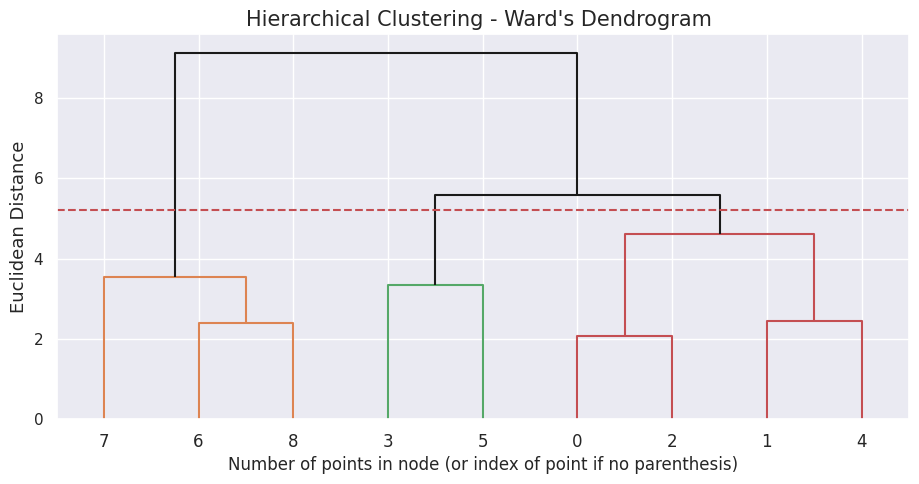

In [166]:
## Plot a dendrogram using the centroid data from hierarchical clustering to visually assess cluster formations.
plot_dendrogram(df_hc_centroids, metric_variables, y_threshold=5.2)

In [167]:
## Apply hierarchical clustering to 'df' using K-means labels and metric variables, creating two new DataFrames: 'df_hc_merged' (with cluster labels) and 'df_hc_centroids' (with cluster centroids), using 3 clusters.
df_hc_merged, df_hc_centroids = hc_merge_mapper(df,'km_dem_labels','km_pref_labels', metric_variables, 'hc_merged_labels', 3)

In [168]:
## Count the number of occurrences for each cluster label in the 'hc_merged_labels' column of the 'df_hc_merged' DataFrame.
df_hc_merged['hc_merged_labels'].value_counts()

0    4565
2    2833
1    2373
Name: hc_merged_labels, dtype: int64

In [169]:
## Create a copy of the 'df_hc_merged' DataFrame and store it in a new DataFrame named 'df'.
df = df_hc_merged.copy()

In [170]:
## Access the 'hc_merged_labels' column from the 'df_hc_merged' DataFrame, which contains cluster labels from the merged solution.
df_hc_merged['hc_merged_labels']

## Use numpy's 'unique' function to find and count the unique values in the 'hc_merged_labels' column, returning both the unique labels and their counts.
np.unique(df_hc_merged['hc_merged_labels'], return_counts=True)

(array([0, 1, 2]), array([4565, 2373, 2833]))

In [171]:
def cluster_profiles(df,
                     label_columns,
                     figsize,
                     compar_titles=None,
                     colors='Set1'):
    """
    Pass df with labels columns of one or multiple clustering labels.
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)

    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2,
                             figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):

        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)

        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]

        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label,
                                         color=sns.color_palette(palette=colors), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1],
                    palette=sns.color_palette(palette=colors))

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy')
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)

    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [172]:
## Name representing the merged cluster labels column
merged_label_name = 'hc_merged_labels'

## List containing different cluster label names including merged labels
labels_list = ['km_dem_labels','km_pref_labels', merged_label_name]


## These labels can refer to distinct cluster labels or identifiers within the dataset.
##'merged_label_name' holds the name assigned to the merged clusters,
## while 'labels_list' encompasses a collection of different cluster labels for reference.


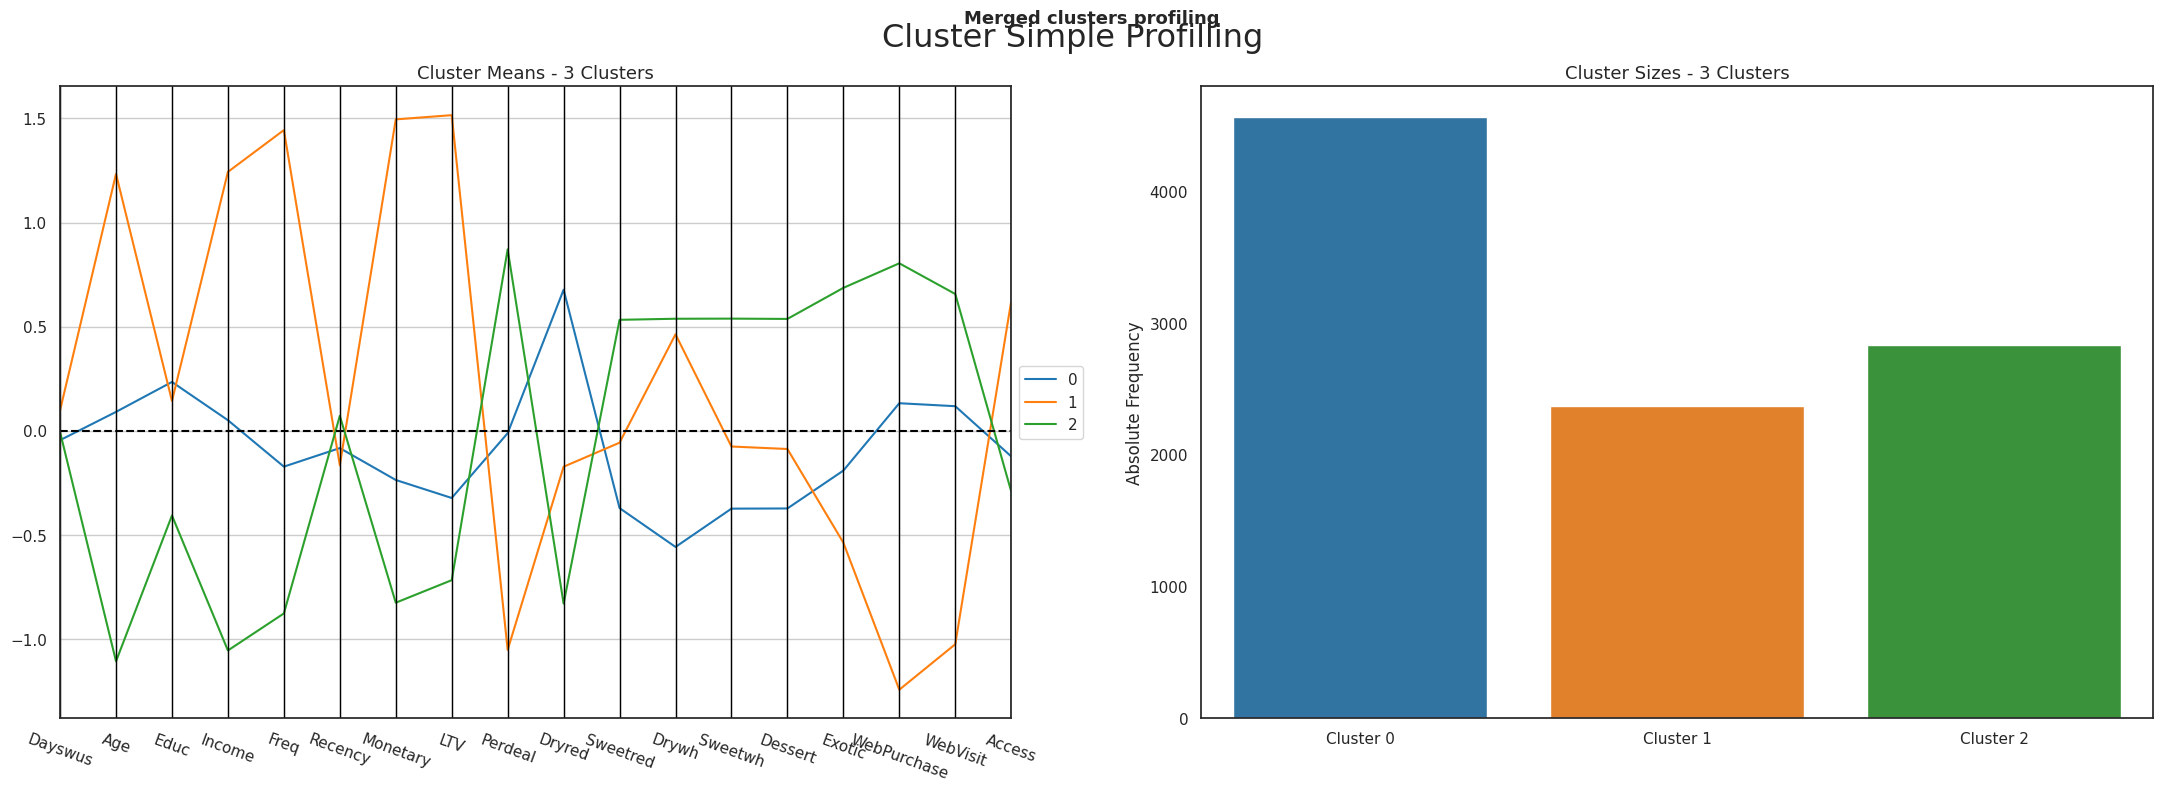

In [173]:
# Profilling each cluster (only merged)
merged_label_list = [merged_label_name]
sns.set(style="white")
cluster_profiles(
    df = df_hc_merged[metric_variables + merged_label_list],
    label_columns = merged_label_list,
    figsize = (27, 8),
    compar_titles = ["Merged clusters profiling"],
    colors='tab10'
)


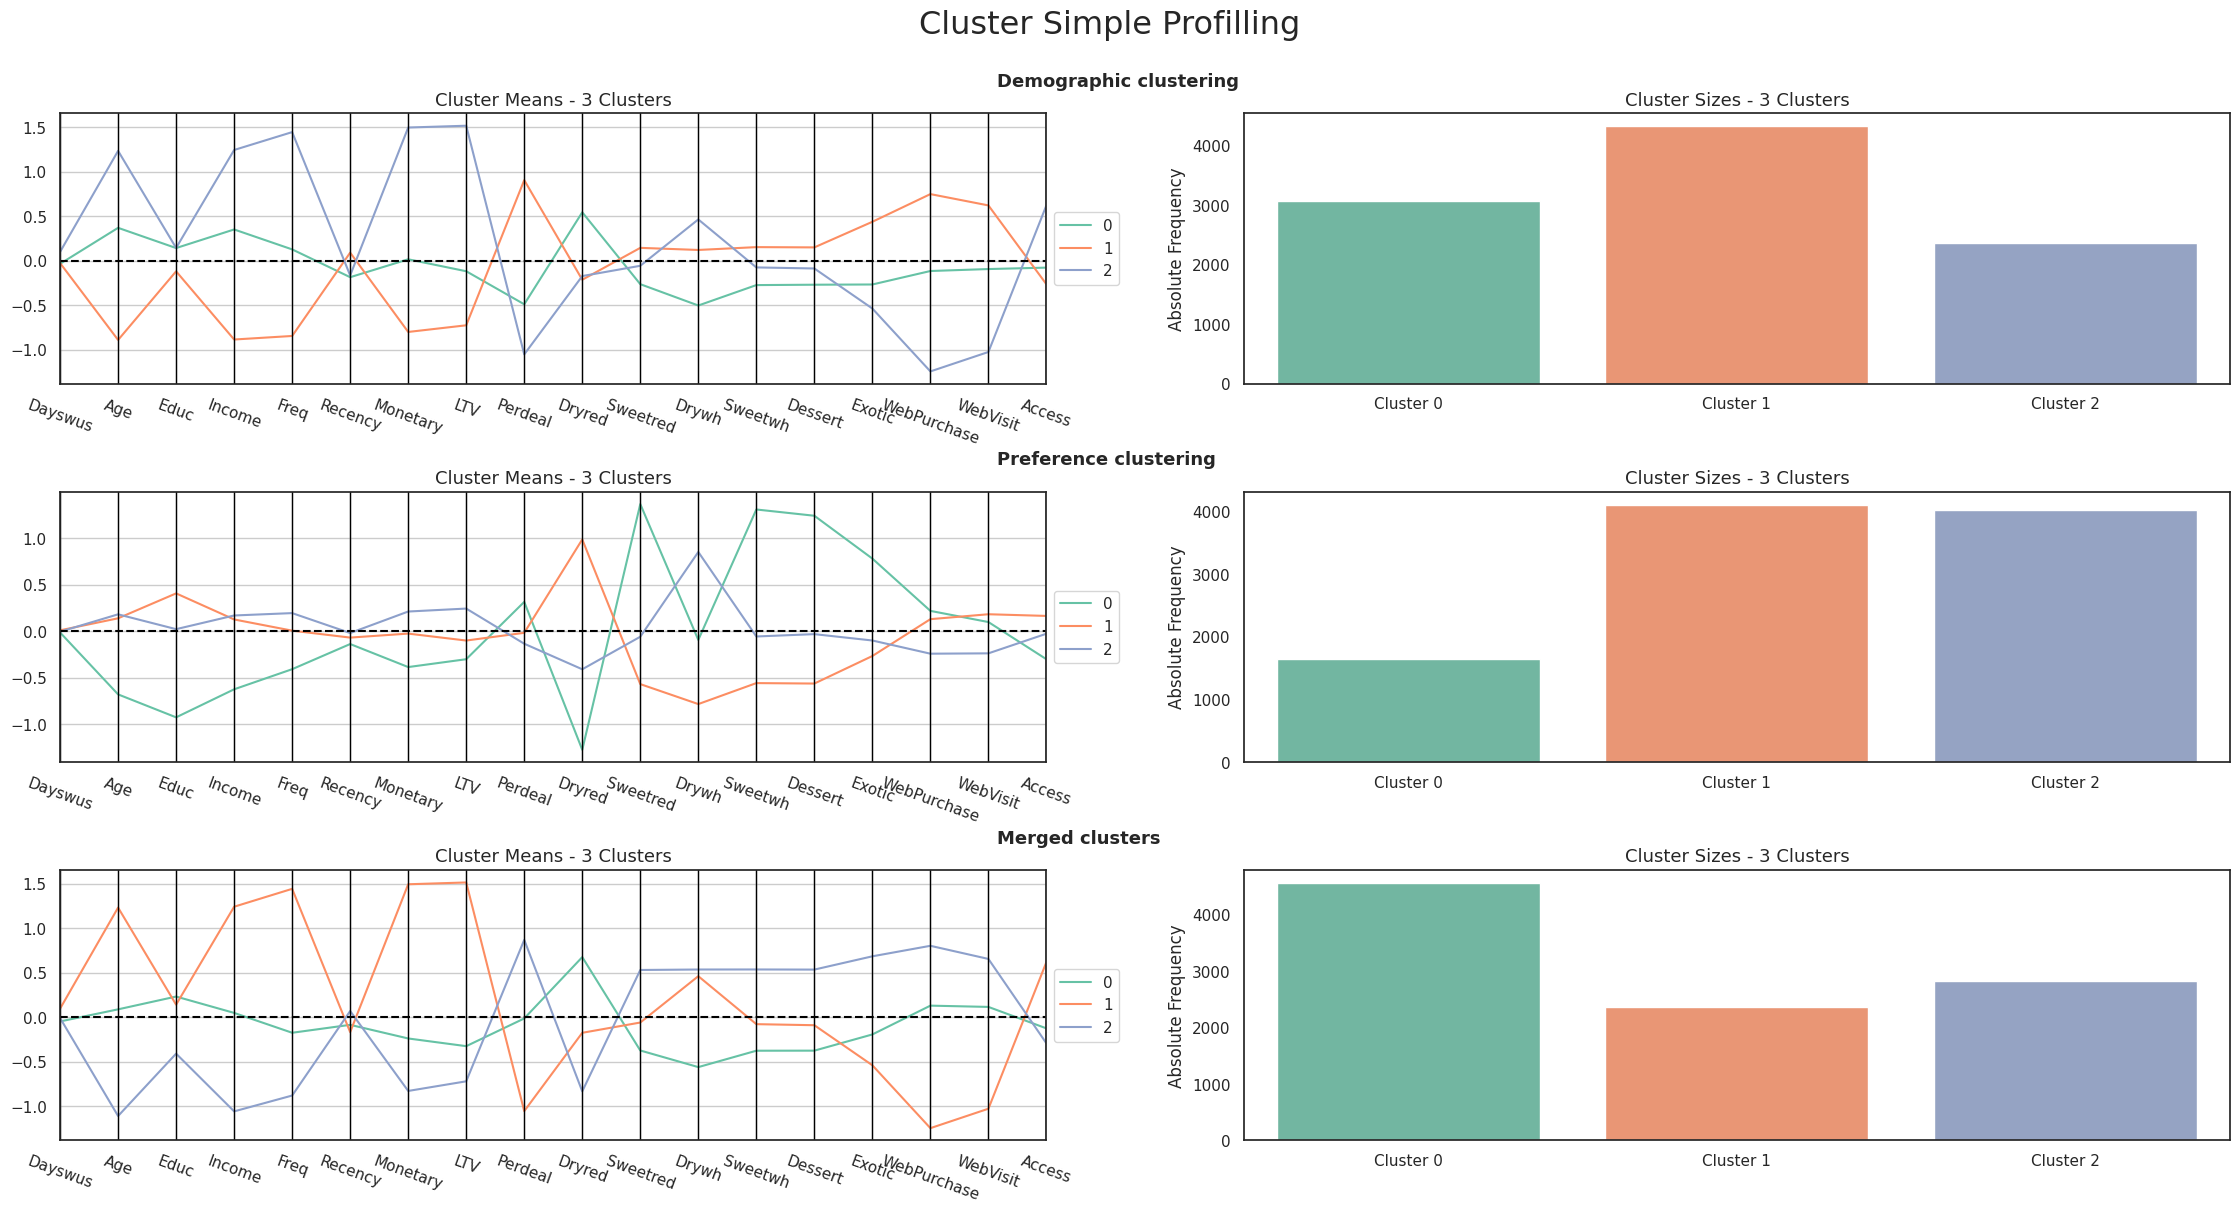

In [174]:
# Profilling each cluster (product, behavior, merged)
sns.set(style="white")
cluster_profiles(
    df = df_hc_merged[metric_variables + labels_list],
    label_columns = labels_list,
    figsize = (28, 13),
    compar_titles = ["Demographic clustering", "Preference clustering", "Merged clusters"],
    colors='Set2'
)

###3.3.3 - TSNE

In [175]:
def plot_tsne(df, feats, label,
              cmap='tab10',
              title="t-SNE Visualization of Clustering Solution"):
    """
    Creates a t-SNE plot to visualize the clustering solution derived from the given features.

    Parameters:
    - df: DataFrame containing the data
    - feats: List of features used for t-SNE dimensionality reduction
    - label: Column name representing cluster labels
    - cmap: Color map for clusters (default: 'tab10')
    - title: Title of the visualization plot (default: "t-SNE Visualization of Clustering Solution")
    """

    ## Reduce dimensionality to 2D using t-SNE
    two_dim = TSNE(random_state=42).fit_transform(df[feats])
    two_dim_df = pd.DataFrame(two_dim, index=df.index)
    two_dim_df[label] = df[label]

    ## Create scatter plot for 2D representation
    fig, ax= plt.subplots(figsize=(10,10))
    scatter = ax.scatter(x = two_dim_df[0],
                        y=two_dim_df[1],
                        c=two_dim_df[label],
                        s=5,
                        cmap=cmap
                        )

    ## Adjust plot settings
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])

    ## Include legend for cluster labels
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="best", title="Cluster Labels")
    ax.add_artist(legend1)

    ## Set the title of the plot
    plt.title(title)
    plt.show()

In [176]:
df

,Custid,Dayswus,Age,Educ,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,Exotic,WebPurchase,WebVisit,Access,dbscan_labels,hc_dem_labels,km_dem_labels,hc_pref_labels,km_pref_labels,hc_merged_labels
0,1001,-0.538821,1.160147,-0.393917,0.756139,0,0,1.200813,0.051426,1.204514,...,-0.843437,-1.262136,-0.522070,1.398495,0,1,2,2,2,1
1,1002,-1.358645,1.738120,1.737959,1.561656,0,0,1.367919,-0.807302,1.413136,...,-0.843437,-1.802060,-1.809436,-0.456273,0,1,2,0,2,1
2,1003,-1.556192,-1.382933,0.672021,-1.505218,1,0,-0.888008,0.094363,-0.894070,...,2.693449,0.897558,0.765296,1.398495,0,0,1,1,0,2
3,1004,-0.025197,0.639972,1.204990,0.857150,0,1,0.532390,-0.750053,0.410205,...,-0.089675,-0.398259,-0.092948,-0.456273,0,1,0,0,1,0
4,1005,0.809442,0.639972,0.672021,0.794892,0,1,0.866602,-0.521059,0.796542,...,0.142252,-0.452251,0.336174,-0.456273,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10996,0.340266,-1.151744,0.139052,-0.565443,0,0,0.699496,0.137299,0.600283,...,1.475832,-0.614228,0.336174,-0.456273,0,1,0,2,2,0
9996,10997,-1.289503,1.622525,-0.926887,2.030276,0,1,1.535024,0.180236,1.615577,...,-0.901419,0.141665,-0.092948,3.253262,0,1,2,0,1,1
9997,10998,-1.541376,1.217944,1.204990,1.076520,0,0,1.284366,0.509415,1.308053,...,-0.727474,-1.316129,-0.951192,-0.456273,0,1,2,0,2,1
9998,10999,-1.482112,0.986755,-1.459856,1.489039,1,0,1.117260,-0.835926,1.124156,...,-0.495547,-0.344266,-0.522070,-0.456273,0,1,2,0,2,1


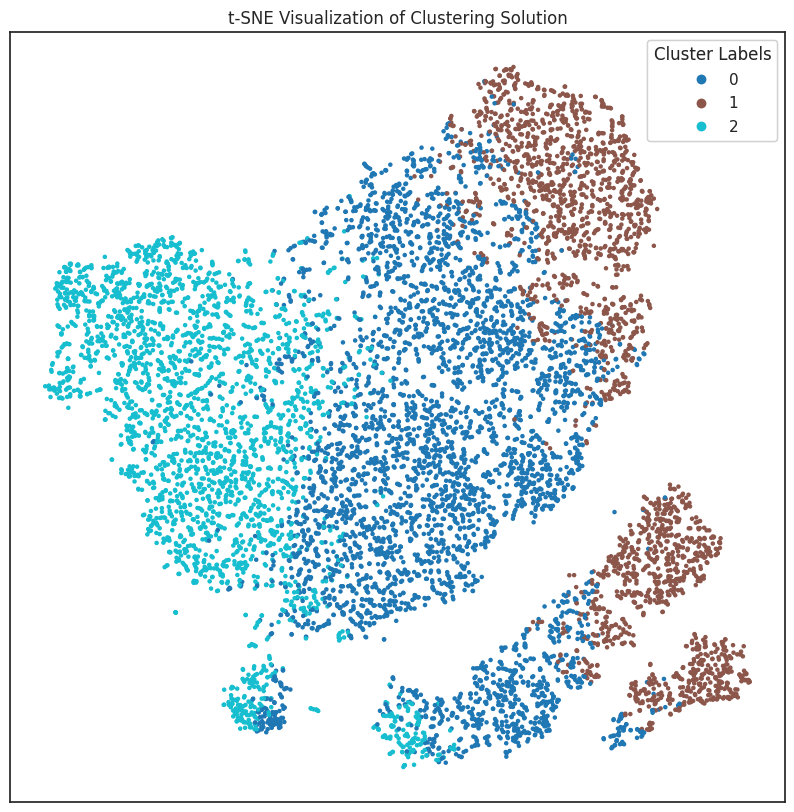

In [177]:
## Visualizing the clusters' distributions using t-SNE for comprehensive understanding and assessment of the merged data
plot_tsne(df, metric_variables, merged_label_name)